In [6]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='pholed_model')
df = df[list(df.columns)[1:-1] + ['cd/A']]
df.dropna(axis=0, inplace=True)

X = df[list(df.columns)[:-1]]
y = df[['cd/A']]

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=12)

# filename = 'adaboost_model.sav'
filename = 'pholed_rf_model.sav'

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
print('R-squared: ', loaded_model.score(X_test, y_test))

R-squared:  0.87869391923


In [3]:
new_df = pd.read_pickle('C:/Anaconda3/projects/oled/vary triplet/triplet.pkl')

new_X = new_df[:]
print(new_X.shape)

y_pred = loaded_model.predict(new_X)
y_pred = [round(float(i), 2) for i in y_pred]

new_X['cd/a'] = y_pred

triplet3 = new_X.loc[new_X['triplet_HOST'] == 3]
triplet3.shape

(348840, 31)


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(38760, 32)

In [9]:
device50 = triplet3.loc[triplet3['cd/a'] > 50]
device45 = triplet3.loc[(triplet3['cd/a'] >= 45) & (new_X['cd/a'] < 45)]
device40 = triplet3.loc[(triplet3['cd/a'] >= 40) & (new_X['cd/a'] < 50)]
device35 = triplet3.loc[(triplet3['cd/a'] >= 35) & (new_X['cd/a'] < 40)]
device30 = triplet3.loc[(triplet3['cd/a'] >= 30) & (new_X['cd/a'] < 35)]
device25 = triplet3.loc[(triplet3['cd/a'] >= 25) & (new_X['cd/a'] < 30)]
device20 = triplet3.loc[(triplet3['cd/a'] >= 20) & (new_X['cd/a'] < 25)]
device10 = triplet3.loc[(triplet3['cd/a'] >= 10) & (new_X['cd/a'] < 20)]
device = triplet3.loc[triplet3['cd/a'] < 10]

(1578, 32)

In [17]:
device25.shape

(5131, 32)

,50,45,40,35,30,25,20,10,0
count,193.000000,0.0,11238.000000,1776.000000,14294.000000,5131.000000,0.0,0.0,4542.000000
mean,2.358860,NaN,2.260392,2.298818,2.315544,2.071214,NaN,NaN,2.238406
std,0.111452,NaN,0.197351,0.180982,0.150433,0.216707,NaN,NaN,0.206041
min,1.900000,NaN,1.900000,1.900000,1.900000,1.900000,NaN,NaN,1.900000
25%,2.400000,NaN,2.200000,2.200000,2.200000,1.900000,NaN,NaN,2.000000
50%,2.400000,NaN,2.400000,2.400000,2.400000,2.000000,NaN,NaN,2.260000
75%,2.400000,NaN,2.400000,2.400000,2.400000,2.200000,NaN,NaN,2.400000
max,2.500000,NaN,2.500000,2.500000,2.500000,2.500000,NaN,NaN,2.500000


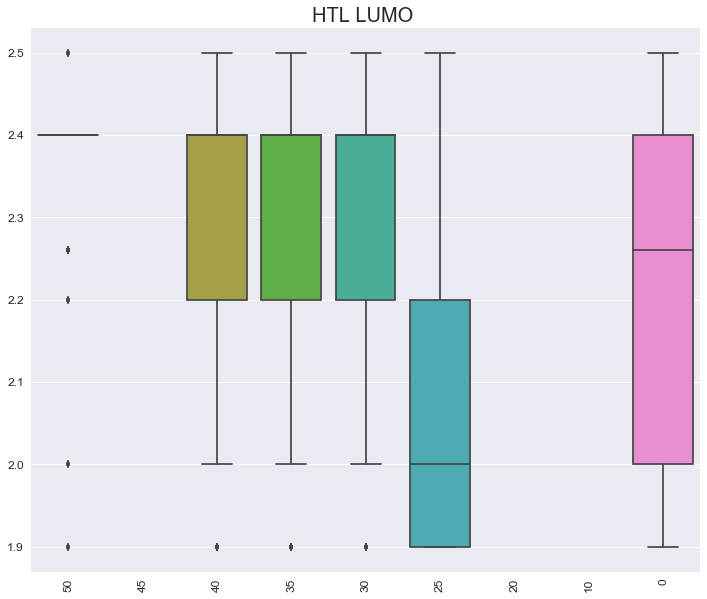

In [15]:
HTL = {'50': device50['lumo_HTL1'], '45': device45['lumo_HTL1'] , '40': device40['lumo_HTL1'] , '35': device35['lumo_HTL1'] , 
       '30': device30['lumo_HTL1'] , '25': device25['lumo_HTL1'], '20': device20['lumo_HTL1'], '10': device20['lumo_HTL1']
      , '0': device['lumo_HTL1']}
sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
df = pd.DataFrame(data=HTL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('HTL LUMO ',fontsize=20);
df.describe()

,50,45,40,35,30,25,20,10,0
count,193.000000,0.0,11238.000000,1776.000000,14294.000000,5131.000000,0.0,0.0,4542.000000
mean,5.870984,NaN,5.631269,5.753773,5.705765,5.332177,NaN,NaN,5.601541
std,0.251014,NaN,0.317888,0.342447,0.276251,0.243255,NaN,NaN,0.322232
min,5.100000,NaN,5.100000,5.100000,5.100000,5.100000,NaN,NaN,5.100000
25%,5.700000,NaN,5.500000,5.500000,5.700000,5.100000,NaN,NaN,5.200000
50%,5.900000,NaN,5.700000,5.800000,5.700000,5.200000,NaN,NaN,5.700000
75%,6.100000,NaN,5.900000,6.100000,5.900000,5.500000,NaN,NaN,5.800000
max,6.100000,NaN,6.100000,6.100000,6.100000,5.900000,NaN,NaN,6.100000


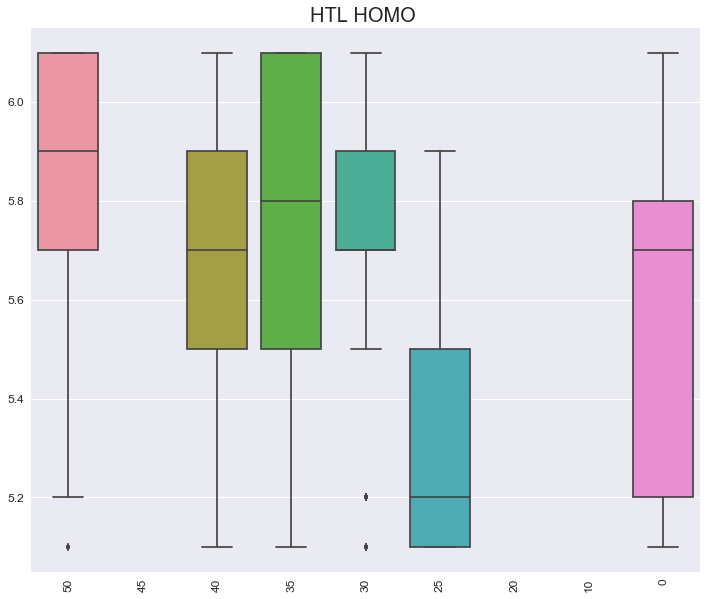

In [18]:
HTL = {'50': device50['homo_HTL1'], '45': device45['homo_HTL1'] , '40': device40['homo_HTL1'] , '35': device35['homo_HTL1'] , 
       '30': device30['homo_HTL1'] , '25': device25['homo_HTL1'], '20': device20['homo_HTL1'], '10': device20['homo_HTL1']
      , '0': device['homo_HTL1']}
sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
df = pd.DataFrame(data=HTL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('HTL HOMO ',fontsize=20);
df.describe()

,50,45,40,35,30,25,20,10,0
count,193.000000,0.0,11238.000000,1776.000000,14294.000000,5131.000000,0.0,0.0,4542.000000
mean,2.854093,NaN,2.766453,2.776712,2.780752,2.694307,NaN,NaN,2.760064
std,0.132913,NaN,0.219147,0.189785,0.228028,0.198603,NaN,NaN,0.214557
min,2.300000,NaN,2.300000,2.300000,2.300000,2.300000,NaN,NaN,2.300000
25%,2.800000,NaN,2.670000,2.670000,2.580000,2.670000,NaN,NaN,2.670000
50%,2.800000,NaN,2.870000,2.800000,2.870000,2.670000,NaN,NaN,2.800000
75%,2.940000,NaN,2.940000,2.940000,2.940000,2.870000,NaN,NaN,2.940000
max,3.000000,NaN,3.000000,3.000000,3.000000,3.000000,NaN,NaN,3.000000


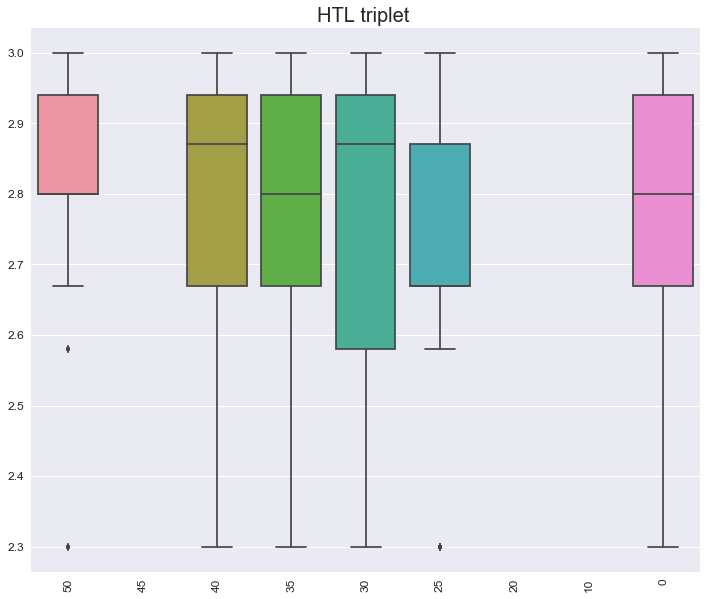

In [19]:
HTL = {'50': device50['triplet_HTL'], '45': device45['triplet_HTL'] , '40': device40['triplet_HTL'] , '35': device35['triplet_HTL'] , 
       '30': device30['triplet_HTL'] , '25': device25['triplet_HTL'], '20': device20['triplet_HTL'], '10': device20['triplet_HTL']
      , '0': device['triplet_HTL']}
sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
df = pd.DataFrame(data=HTL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('HTL triplet ',fontsize=20);
df.describe()


,50,45,40,35,30,25,20,10,0
count,193.000000,0.0,11238.000000,1776.000000,14294.000000,5131.000000,0.0,0.0,4542.000000
mean,2.397824,NaN,2.419721,2.419611,2.421496,2.410084,NaN,NaN,2.380696
std,0.211346,NaN,0.252061,0.224874,0.259074,0.233499,NaN,NaN,0.230157
min,2.020000,NaN,2.020000,2.020000,2.020000,2.020000,NaN,NaN,2.020000
25%,2.300000,NaN,2.280000,2.300000,2.280000,2.280000,NaN,NaN,2.270000
50%,2.400000,NaN,2.400000,2.400000,2.400000,2.400000,NaN,NaN,2.300000
75%,2.460000,NaN,2.460000,2.460000,2.460000,2.550000,NaN,NaN,2.460000
max,3.000000,NaN,3.000000,3.000000,3.000000,3.000000,NaN,NaN,3.000000


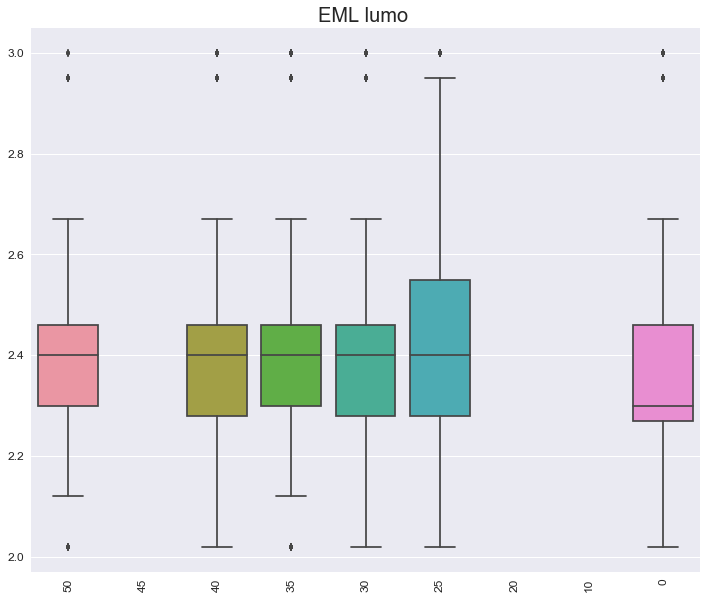

In [20]:
EML = {'50': device50['LUMO_EML'], '45': device45['LUMO_EML'] , '40': device40['LUMO_EML'] , '35': device35['LUMO_EML'] , 
       '30': device30['LUMO_EML'] , '25': device25['LUMO_EML'], '20': device20['LUMO_EML'], '10': device20['LUMO_EML']
      , '0': device['LUMO_EML']}
sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
df = pd.DataFrame(data=EML).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('EML lumo ',fontsize=20);


,50,45,40,35,30,25,20,10,0
count,193.000000,0.0,11238.000000,1776.000000,14294.000000,5131.000000,0.0,0.0,4542.000000
mean,6.151399,NaN,5.909700,6.171655,5.899594,5.825137,NaN,NaN,5.788309
std,0.701275,NaN,0.422593,0.721644,0.410449,0.123212,NaN,NaN,0.116628
min,5.560000,NaN,5.560000,5.560000,5.560000,5.560000,NaN,NaN,5.560000
25%,5.710000,NaN,5.710000,5.710000,5.710000,5.800000,NaN,NaN,5.700000
50%,5.860000,NaN,5.850000,5.850000,5.850000,5.860000,NaN,NaN,5.800000
75%,6.060000,NaN,5.900000,5.955000,5.900000,5.900000,NaN,NaN,5.900000
max,7.500000,NaN,7.500000,7.500000,7.500000,6.060000,NaN,NaN,6.060000


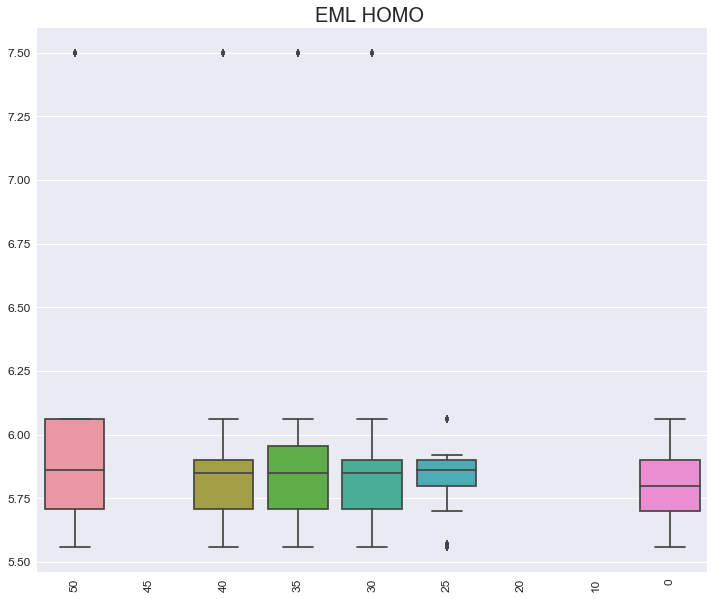

In [21]:
EML = {'50': device50['HOMO_EML'], '45': device45['HOMO_EML'] , '40': device40['HOMO_EML'] , '35': device35['HOMO_EML'] , 
       '30': device30['HOMO_EML'] , '25': device25['HOMO_EML'], '20': device20['HOMO_EML'], '10': device20['HOMO_EML']
      , '0': device['HOMO_EML']}
sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
df = pd.DataFrame(data=EML).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('EML HOMO ',fontsize=20);
df.describe()

,50,45,40,35,30,25,20,10,0
count,1.930000e+02,0.0,11238.000000,1776.000000,14294.000000,5131.000000,0.0,0.0,4542.000000
mean,3.470000e+00,NaN,2.812267,3.001267,2.719291,2.842423,NaN,NaN,3.090401
std,1.647404e-14,NaN,0.326384,0.449105,0.260038,0.252211,NaN,NaN,0.292142
min,3.470000e+00,NaN,2.260000,2.260000,2.260000,2.260000,NaN,NaN,2.800000
25%,3.470000e+00,NaN,2.600000,2.520000,2.520000,2.700000,NaN,NaN,2.800000
50%,3.470000e+00,NaN,2.730000,2.750000,2.700000,2.880000,NaN,NaN,3.000000
75%,3.470000e+00,NaN,2.910000,3.470000,2.880000,2.910000,NaN,NaN,3.500000
max,3.470000e+00,NaN,3.470000,3.470000,3.320000,3.320000,NaN,NaN,3.500000


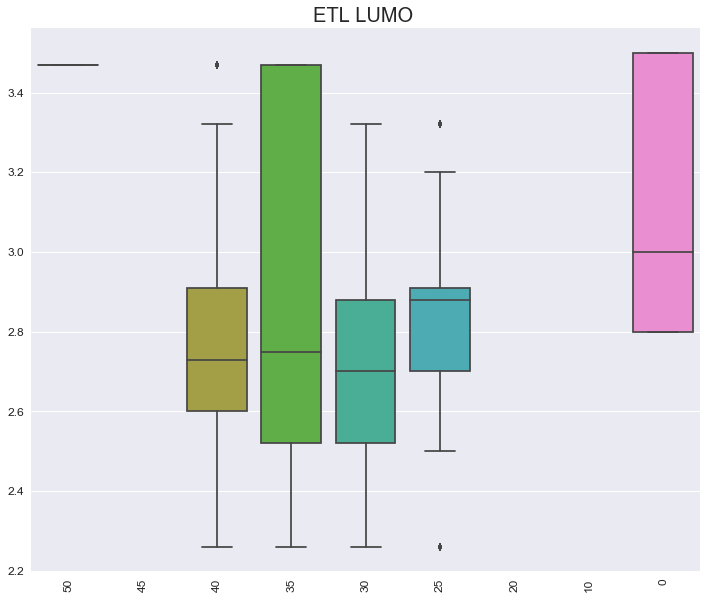

In [23]:
ETL = {'50': device50['lumo_ETL1'], '45': device45['lumo_ETL1'] , '40': device40['lumo_ETL1'] , '35': device35['lumo_ETL1'] , 
       '30': device30['lumo_ETL1'] , '25': device25['lumo_ETL1'], '20': device20['lumo_ETL1'], '10': device20['lumo_ETL1']
      , '0': device['lumo_ETL1']}
sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
df = pd.DataFrame(data=ETL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('ETL LUMO ',fontsize=20);
df.describe()

,50,45,40,35,30,25,20,10,0
count,193.0,0.0,11238.000000,1776.000000,14294.000000,5131.000000,0.0,0.0,4542.000000
mean,7.5,NaN,6.545773,6.973806,6.462425,6.392693,NaN,NaN,6.522281
std,0.0,NaN,0.445868,0.530272,0.342178,0.338933,NaN,NaN,0.337107
min,7.5,NaN,5.850000,5.850000,5.850000,5.850000,NaN,NaN,6.200000
25%,7.5,NaN,6.130000,6.500000,6.130000,6.020000,NaN,NaN,6.200000
50%,7.5,NaN,6.560000,6.800000,6.500000,6.500000,NaN,NaN,6.400000
75%,7.5,NaN,6.800000,7.500000,6.790000,6.670000,NaN,NaN,7.000000
max,7.5,NaN,7.500000,7.500000,7.000000,7.000000,NaN,NaN,7.000000


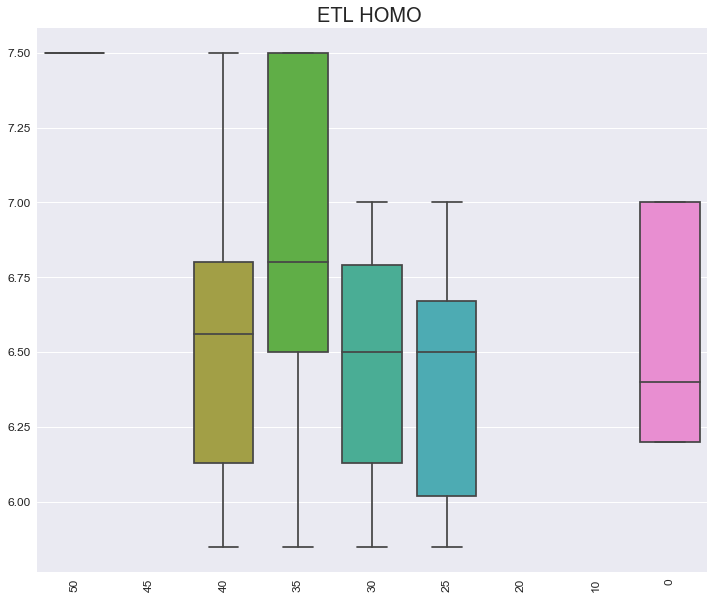

In [24]:
HTL = {'50': device50['homo_ETL1'], '45': device45['homo_ETL1'] , '40': device40['homo_ETL1'] , '35': device35['homo_ETL1'] , 
       '30': device30['homo_ETL1'] , '25': device25['homo_ETL1'], '20': device20['homo_ETL1'], '10': device20['homo_ETL1']
      , '0': device['homo_ETL1']}
sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
df = pd.DataFrame(data=HTL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('ETL HOMO ',fontsize=20);
df.describe()

,50,45,40,35,30,25,20,10,0
count,1.930000e+02,0.0,11238.000000,1776.000000,14294.000000,5131.000000,0.0,0.0,4542.000000
mean,2.990000e+00,NaN,2.850224,2.951064,2.846718,2.790357,NaN,NaN,2.566380
std,6.678663e-15,NaN,0.216759,0.221002,0.235467,0.149871,NaN,NaN,0.047246
min,2.990000e+00,NaN,2.690000,2.690000,2.690000,2.690000,NaN,NaN,2.500000
25%,2.990000e+00,NaN,2.700000,2.750000,2.700000,2.700000,NaN,NaN,2.500000
50%,2.990000e+00,NaN,2.750000,2.990000,2.750000,2.750000,NaN,NaN,2.600000
75%,2.990000e+00,NaN,2.950000,2.990000,2.800000,2.800000,NaN,NaN,2.600000
max,2.990000e+00,NaN,3.400000,3.400000,3.400000,3.400000,NaN,NaN,2.600000


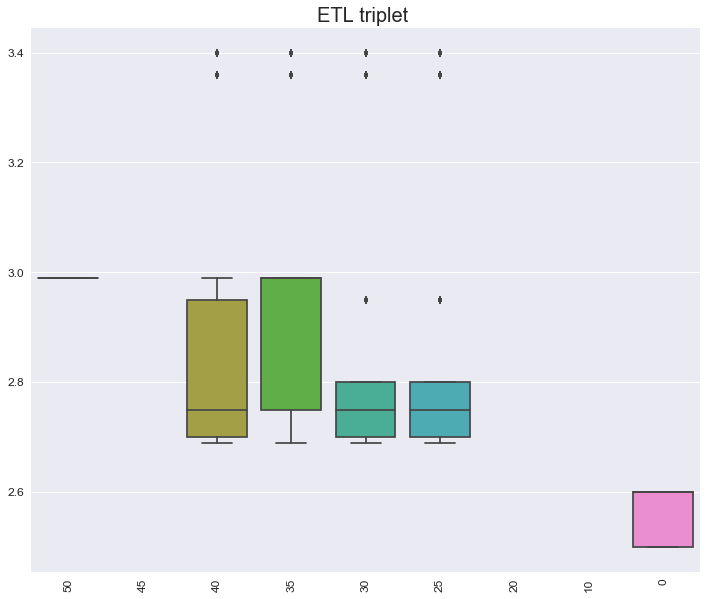

In [25]:
HTL = {'50': device50['triplet_ETL'], '45': device45['triplet_ETL'] , '40': device40['triplet_ETL'] , '35': device35['triplet_ETL'] , 
       '30': device30['triplet_ETL'] , '25': device25['triplet_ETL'], '20': device20['triplet_ETL'], '10': device20['triplet_ETL']
      , '0': device['triplet_ETL']}
sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
df = pd.DataFrame(data=HTL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('ETL triplet ',fontsize=20);
df.describe()

In [36]:
triplet295 = new_X.loc[new_X['triplet_HOST'] == 2.95]
print(triplet295.shape)
device50 = triplet295.loc[triplet295['cd/a'] > 50]
device45 = triplet295.loc[(triplet295['cd/a'] >= 45) & (new_X['cd/a'] < 45)]
device40 = triplet295.loc[(triplet295['cd/a'] >= 40) & (new_X['cd/a'] < 50)]
device35 = triplet295.loc[(triplet295['cd/a'] >= 35) & (new_X['cd/a'] < 40)]
device30 = triplet295.loc[(triplet295['cd/a'] >= 30) & (new_X['cd/a'] < 35)]
device25 = triplet295.loc[(triplet295['cd/a'] >= 25) & (new_X['cd/a'] < 30)]
device20 = triplet295.loc[(triplet295['cd/a'] >= 20) & (new_X['cd/a'] < 25)]
device10 = triplet295.loc[(triplet295['cd/a'] >= 10) & (new_X['cd/a'] < 20)]
device = triplet295.loc[triplet295['cd/a'] < 10]
device50.shape

(38760, 32)


(251, 32)

,50,45,40,35,30,25,20,10,0
count,251.000000,0.0,11474.000000,3608.000000,15342.000000,1960.000000,0.0,0.0,4965.000000
mean,2.332351,NaN,2.260471,2.330904,2.266568,2.024776,NaN,NaN,2.242272
std,0.124459,NaN,0.196512,0.137691,0.190906,0.215493,NaN,NaN,0.202966
min,1.900000,NaN,1.900000,1.900000,1.900000,1.900000,NaN,NaN,1.900000
25%,2.260000,NaN,2.200000,2.260000,2.200000,1.900000,NaN,NaN,2.000000
50%,2.400000,NaN,2.400000,2.400000,2.260000,1.900000,NaN,NaN,2.260000
75%,2.400000,NaN,2.400000,2.400000,2.400000,2.000000,NaN,NaN,2.400000
max,2.500000,NaN,2.500000,2.500000,2.500000,2.500000,NaN,NaN,2.500000


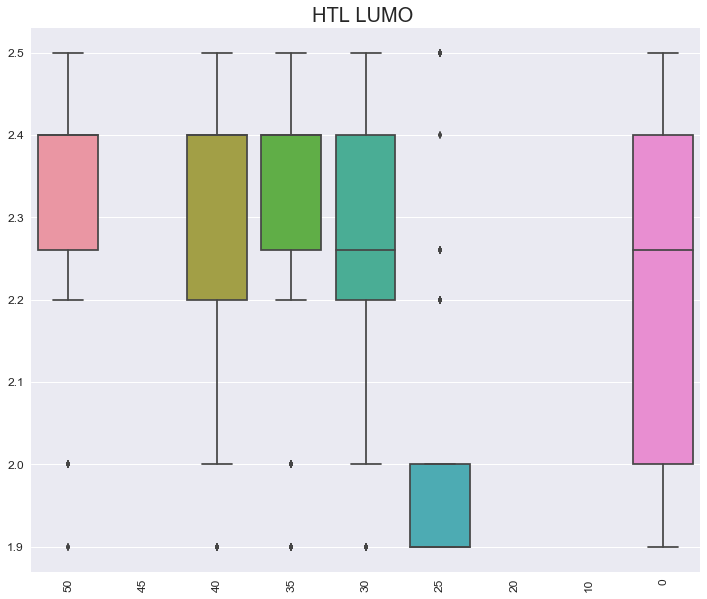

In [37]:
HTL = {'50': device50['lumo_HTL1'], '45': device45['lumo_HTL1'] , '40': device40['lumo_HTL1'] , '35': device35['lumo_HTL1'] , 
       '30': device30['lumo_HTL1'] , '25': device25['lumo_HTL1'], '20': device20['lumo_HTL1'], '10': device20['lumo_HTL1']
      , '0': device['lumo_HTL1']}
sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
df = pd.DataFrame(data=HTL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('HTL LUMO ',fontsize=20);
df.describe()

,50,45,40,35,30,25,20,10,0
count,251.000000,0.0,11474.000000,3608.000000,15342.000000,1960.000000,0.0,0.0,4965.000000
mean,5.835857,NaN,5.632796,5.829601,5.619496,5.218776,NaN,NaN,5.607573
std,0.236282,NaN,0.316416,0.276417,0.295456,0.176242,NaN,NaN,0.317168
min,5.100000,NaN,5.100000,5.100000,5.100000,5.100000,NaN,NaN,5.100000
25%,5.700000,NaN,5.500000,5.700000,5.500000,5.100000,NaN,NaN,5.200000
50%,5.800000,NaN,5.700000,5.900000,5.700000,5.100000,NaN,NaN,5.700000
75%,6.100000,NaN,5.900000,6.100000,5.800000,5.200000,NaN,NaN,5.800000
max,6.100000,NaN,6.100000,6.100000,6.100000,5.800000,NaN,NaN,6.100000


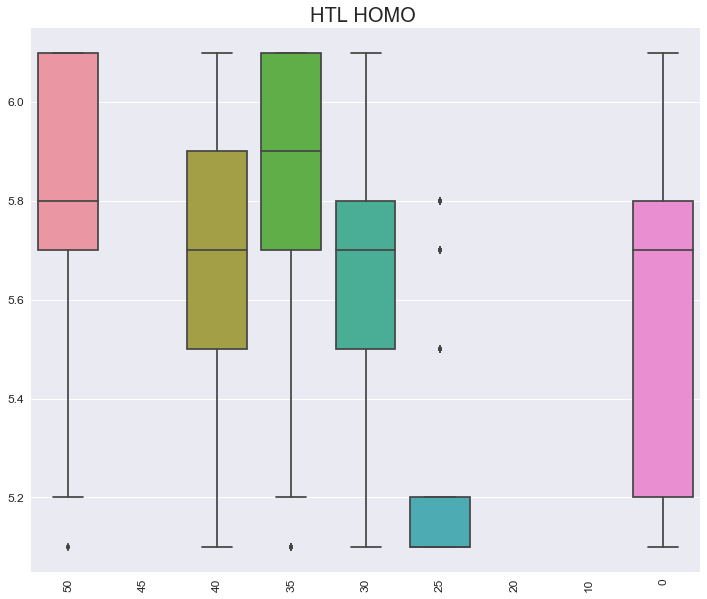

In [38]:
HTL = {'50': device50['homo_HTL1'], '45': device45['homo_HTL1'] , '40': device40['homo_HTL1'] , '35': device35['homo_HTL1'] , 
       '30': device30['homo_HTL1'] , '25': device25['homo_HTL1'], '20': device20['homo_HTL1'], '10': device20['homo_HTL1']
      , '0': device['homo_HTL1']}
sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
df = pd.DataFrame(data=HTL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('HTL HOMO ',fontsize=20);
df.describe()

,50,45,40,35,30,25,20,10,0
count,251.000000,0.0,11474.000000,3608.000000,15342.000000,1960.000000,0.0,0.0,4965.000000
mean,2.860916,NaN,2.766466,2.816976,2.758399,2.658306,NaN,NaN,2.760592
std,0.134058,NaN,0.218981,0.169201,0.232393,0.178242,NaN,NaN,0.215460
min,2.300000,NaN,2.300000,2.300000,2.300000,2.300000,NaN,NaN,2.300000
25%,2.800000,NaN,2.670000,2.800000,2.580000,2.670000,NaN,NaN,2.670000
50%,2.940000,NaN,2.870000,2.800000,2.870000,2.670000,NaN,NaN,2.800000
75%,2.940000,NaN,2.940000,2.940000,2.940000,2.670000,NaN,NaN,2.940000
max,3.000000,NaN,3.000000,3.000000,3.000000,2.940000,NaN,NaN,3.000000


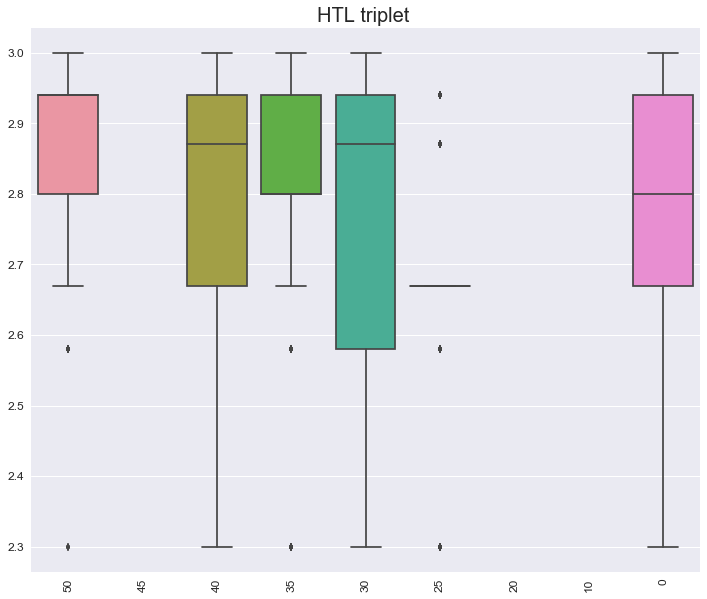

In [39]:
HTL = {'50': device50['triplet_HTL'], '45': device45['triplet_HTL'] , '40': device40['triplet_HTL'] , '35': device35['triplet_HTL'] , 
       '30': device30['triplet_HTL'] , '25': device25['triplet_HTL'], '20': device20['triplet_HTL'], '10': device20['triplet_HTL']
      , '0': device['triplet_HTL']}
sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
df = pd.DataFrame(data=HTL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('HTL triplet ',fontsize=20);
df.describe()


,50,45,40,35,30,25,20,10,0
count,251.000000,0.0,11474.000000,3608.000000,15342.000000,1960.000000,0.0,0.0,4965.000000
mean,2.395737,NaN,2.418957,2.419631,2.416311,2.439393,NaN,NaN,2.402552
std,0.205963,NaN,0.251844,0.242004,0.255941,0.221767,NaN,NaN,0.248066
min,2.020000,NaN,2.020000,2.020000,2.020000,2.020000,NaN,NaN,2.020000
25%,2.300000,NaN,2.280000,2.300000,2.270000,2.300000,NaN,NaN,2.270000
50%,2.400000,NaN,2.400000,2.400000,2.400000,2.400000,NaN,NaN,2.300000
75%,2.460000,NaN,2.460000,2.460000,2.460000,2.550000,NaN,NaN,2.460000
max,3.000000,NaN,3.000000,3.000000,3.000000,3.000000,NaN,NaN,3.000000


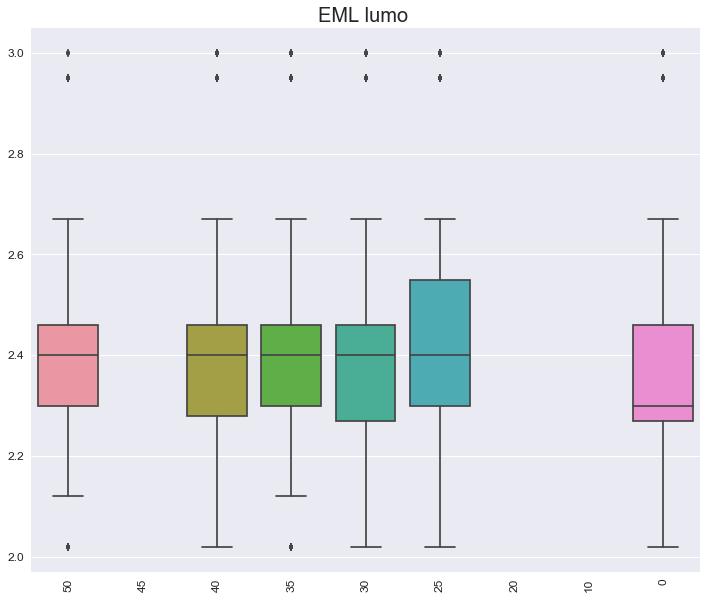

In [40]:
EML = {'50': device50['LUMO_EML'], '45': device45['LUMO_EML'] , '40': device40['LUMO_EML'] , '35': device35['LUMO_EML'] , 
       '30': device30['LUMO_EML'] , '25': device25['LUMO_EML'], '20': device20['LUMO_EML'], '10': device20['LUMO_EML']
      , '0': device['LUMO_EML']}
sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
df = pd.DataFrame(data=EML).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('EML lumo ',fontsize=20);
df.describe()

,50,45,40,35,30,25,20,10,0
count,251.000000,0.0,11474.000000,3608.000000,15342.000000,1960.000000,0.0,0.0,4965.000000
mean,6.066693,NaN,5.907215,6.115166,5.862771,5.859321,NaN,NaN,5.799823
std,0.636683,NaN,0.418915,0.708812,0.316536,0.104159,NaN,NaN,0.124596
min,5.560000,NaN,5.560000,5.560000,5.560000,5.560000,NaN,NaN,5.560000
25%,5.710000,NaN,5.710000,5.700000,5.710000,5.800000,NaN,NaN,5.700000
50%,5.850000,NaN,5.850000,5.800000,5.850000,5.900000,NaN,NaN,5.800000
75%,5.900000,NaN,5.900000,5.900000,5.900000,5.900000,NaN,NaN,5.900000
max,7.500000,NaN,7.500000,7.500000,7.500000,6.060000,NaN,NaN,6.060000


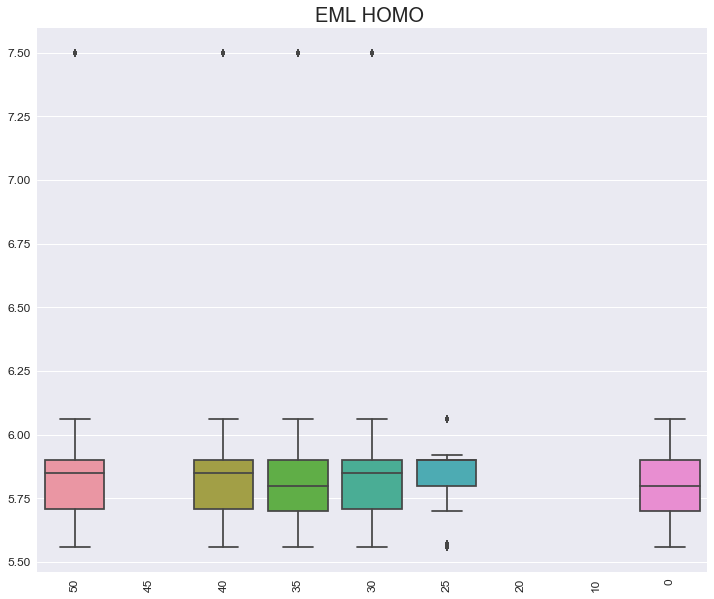

In [41]:
EML = {'50': device50['HOMO_EML'], '45': device45['HOMO_EML'] , '40': device40['HOMO_EML'] , '35': device35['HOMO_EML'] , 
       '30': device30['HOMO_EML'] , '25': device25['HOMO_EML'], '20': device20['HOMO_EML'], '10': device20['HOMO_EML']
      , '0': device['HOMO_EML']}
sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
df = pd.DataFrame(data=EML).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('EML HOMO ',fontsize=20);
df.describe()

,50,45,40,35,30,25,20,10,0
count,2.510000e+02,0.0,11474.000000,3608.000000,15342.000000,1960.000000,0.0,0.0,4965.000000
mean,3.470000e+00,NaN,2.825796,2.744645,2.753146,2.874010,NaN,NaN,3.087815
std,1.913399e-14,NaN,0.336230,0.347972,0.268511,0.221596,NaN,NaN,0.291054
min,3.470000e+00,NaN,2.260000,2.260000,2.260000,2.260000,NaN,NaN,2.800000
25%,3.470000e+00,NaN,2.600000,2.500000,2.520000,2.730000,NaN,NaN,2.800000
50%,3.470000e+00,NaN,2.730000,2.600000,2.730000,2.880000,NaN,NaN,3.000000
75%,3.470000e+00,NaN,2.910000,2.750000,2.880000,2.910000,NaN,NaN,3.500000
max,3.470000e+00,NaN,3.470000,3.470000,3.320000,3.320000,NaN,NaN,3.500000


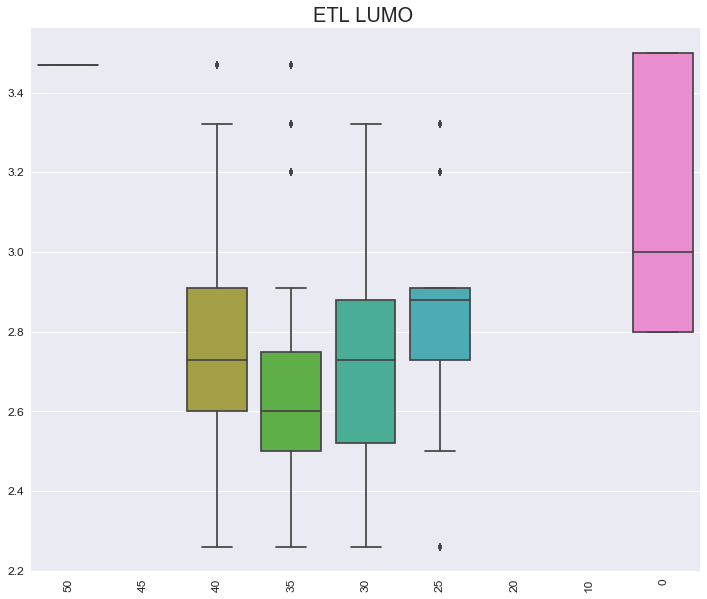

In [42]:
ETL = {'50': device50['lumo_ETL1'], '45': device45['lumo_ETL1'] , '40': device40['lumo_ETL1'] , '35': device35['lumo_ETL1'] , 
       '30': device30['lumo_ETL1'] , '25': device25['lumo_ETL1'], '20': device20['lumo_ETL1'], '10': device20['lumo_ETL1']
      , '0': device['lumo_ETL1']}
sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
df = pd.DataFrame(data=ETL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('ETL LUMO ',fontsize=20);
df.describe()

,50,45,40,35,30,25,20,10,0
count,251.0,0.0,11474.000000,3608.000000,15342.000000,1960.000000,0.0,0.0,4965.000000
mean,7.5,NaN,6.565400,6.670493,6.445639,6.337582,NaN,NaN,6.519235
std,0.0,NaN,0.461578,0.448365,0.344945,0.316690,NaN,NaN,0.335819
min,7.5,NaN,5.850000,5.850000,5.850000,5.850000,NaN,NaN,6.200000
25%,7.5,NaN,6.130000,6.500000,6.120000,6.020000,NaN,NaN,6.200000
50%,7.5,NaN,6.560000,6.790000,6.500000,6.300000,NaN,NaN,6.400000
75%,7.5,NaN,6.800000,6.800000,6.790000,6.560000,NaN,NaN,7.000000
max,7.5,NaN,7.500000,7.500000,7.000000,7.000000,NaN,NaN,7.000000


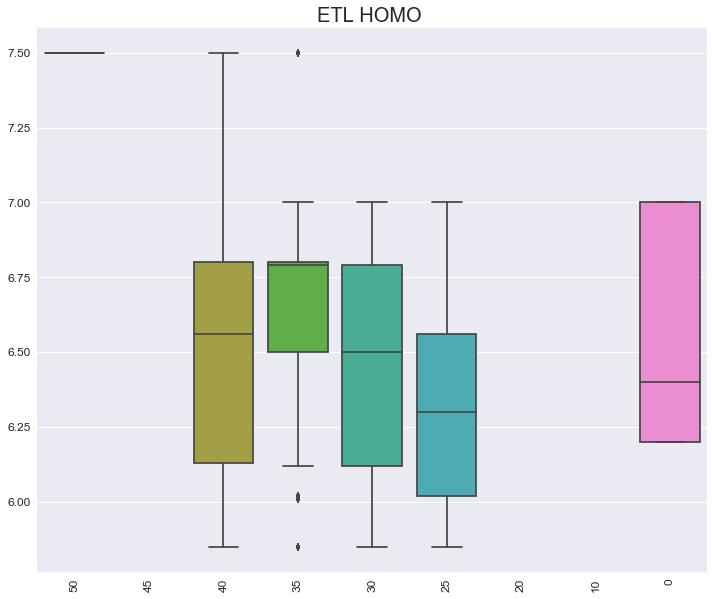

In [43]:
HTL = {'50': device50['homo_ETL1'], '45': device45['homo_ETL1'] , '40': device40['homo_ETL1'] , '35': device35['homo_ETL1'] , 
       '30': device30['homo_ETL1'] , '25': device25['homo_ETL1'], '20': device20['homo_ETL1'], '10': device20['homo_ETL1']
      , '0': device['homo_ETL1']}
sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
df = pd.DataFrame(data=HTL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('ETL HOMO ',fontsize=20);
df.describe()

,50,45,40,35,30,25,20,10,0
count,2.510000e+02,0.0,11474.000000,3608.000000,15342.000000,1960.000000,0.0,0.0,4965.000000
mean,2.990000e+00,NaN,2.853099,2.922367,2.829742,2.766071,NaN,NaN,2.566062
std,7.119624e-15,NaN,0.215433,0.271188,0.213964,0.097569,NaN,NaN,0.047355
min,2.990000e+00,NaN,2.690000,2.690000,2.690000,2.690000,NaN,NaN,2.500000
25%,2.990000e+00,NaN,2.700000,2.700000,2.700000,2.700000,NaN,NaN,2.500000
50%,2.990000e+00,NaN,2.750000,2.760000,2.750000,2.750000,NaN,NaN,2.600000
75%,2.990000e+00,NaN,2.950000,2.990000,2.800000,2.760000,NaN,NaN,2.600000
max,2.990000e+00,NaN,3.400000,3.400000,3.400000,3.400000,NaN,NaN,2.600000


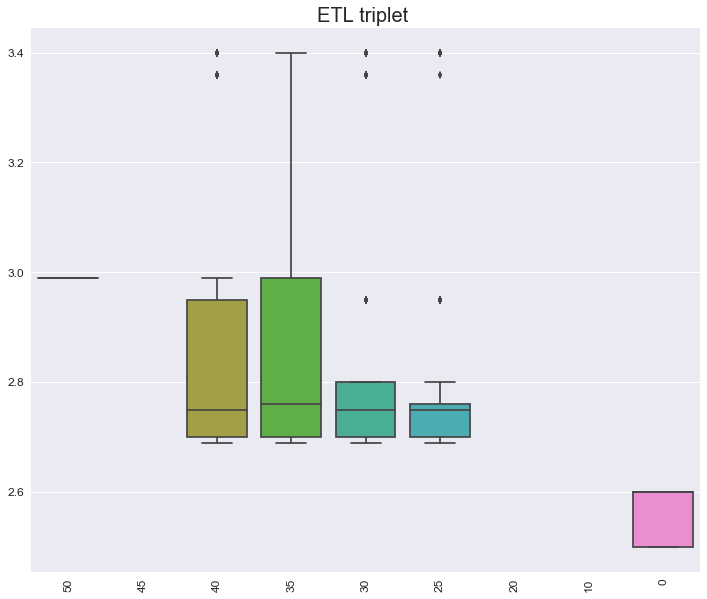

In [44]:
HTL = {'50': device50['triplet_ETL'], '45': device45['triplet_ETL'] , '40': device40['triplet_ETL'] , '35': device35['triplet_ETL'] , 
       '30': device30['triplet_ETL'] , '25': device25['triplet_ETL'], '20': device20['triplet_ETL'], '10': device20['triplet_ETL']
      , '0': device['triplet_ETL']}
sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
df = pd.DataFrame(data=HTL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('ETL triplet ',fontsize=20);
df.describe()

In [83]:
triplet29 = new_X.loc[new_X['triplet_HOST'] == 2.9]
print(triplet29.shape)
device50 = triplet29.loc[triplet29['cd/a'] > 50]
device45 = triplet29.loc[(triplet29['cd/a'] >= 45) & (new_X['cd/a'] < 45)]
device40 = triplet29.loc[(triplet29['cd/a'] >= 40) & (new_X['cd/a'] < 50)]
device35 = triplet29.loc[(triplet29['cd/a'] >= 35) & (new_X['cd/a'] < 40)]
device30 = triplet29.loc[(triplet29['cd/a'] >= 30) & (new_X['cd/a'] < 35)]
device25 = triplet29.loc[(triplet29['cd/a'] >= 25) & (new_X['cd/a'] < 30)]
device20 = triplet29.loc[(triplet29['cd/a'] >= 20) & (new_X['cd/a'] < 25)]
device10 = triplet29.loc[(triplet29['cd/a'] >= 10) & (new_X['cd/a'] < 20)]
device = triplet29.loc[triplet29['cd/a'] < 10]
device50.shape

(45600, 32)


(279, 32)

,50,45,40,35,30,25,20,10,0
count,279.000000,0.0,13363.000000,1967.000000,18158.000000,4623.000000,0.0,0.0,6288.000000
mean,2.335914,NaN,2.260250,2.294204,2.281811,2.133567,NaN,NaN,2.245608
std,0.116504,NaN,0.196835,0.181418,0.170675,0.263456,NaN,NaN,0.200854
min,1.900000,NaN,1.900000,1.900000,1.900000,1.900000,NaN,NaN,1.900000
25%,2.260000,NaN,2.200000,2.200000,2.200000,1.900000,NaN,NaN,2.000000
50%,2.400000,NaN,2.400000,2.400000,2.400000,2.000000,NaN,NaN,2.260000
75%,2.400000,NaN,2.400000,2.400000,2.400000,2.500000,NaN,NaN,2.400000
max,2.500000,NaN,2.500000,2.500000,2.500000,2.500000,NaN,NaN,2.500000


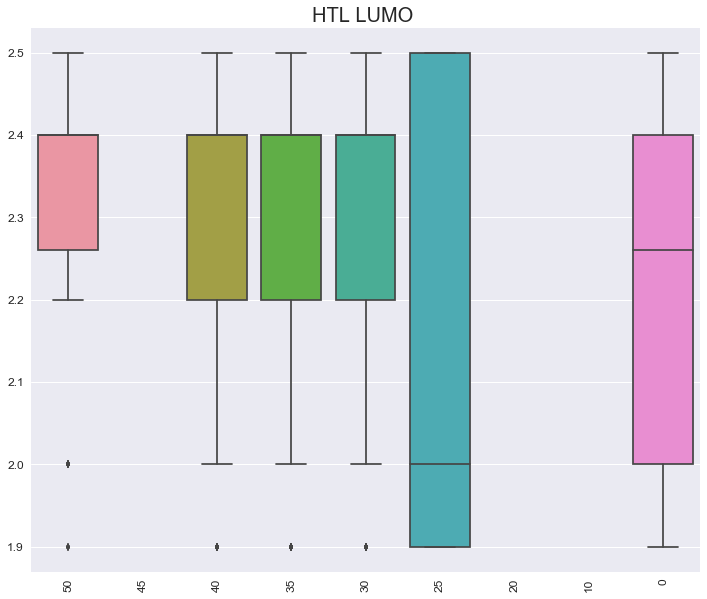

In [84]:
column = 'lumo_HTL1'
HTL = {'50': device50[column], '45': device45[column] , '40': device40[column] , '35': device35[column] , 
       '30': device30[column] , '25': device25[column], '20': device20[column], '10': device20[column]
      , '0': device[column]}
sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
df = pd.DataFrame(data=HTL).reindex(columns=sequence)

# boxplot
f, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(data=df)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title('HTL LUMO ',fontsize=20);
df.describe()

,50,45,40,35,30,25,20,10,0
count,279.000000,0.0,13363.000000,1967.000000,18158.000000,4623.000000,0.0,0.0,6288.000000
mean,5.850538,NaN,5.632844,5.739197,5.695038,5.264633,NaN,NaN,5.615426
std,0.230868,NaN,0.317010,0.342384,0.277998,0.202786,NaN,NaN,0.315665
min,5.100000,NaN,5.100000,5.100000,5.100000,5.100000,NaN,NaN,5.100000
25%,5.700000,NaN,5.500000,5.500000,5.500000,5.100000,NaN,NaN,5.200000
50%,5.800000,NaN,5.700000,5.800000,5.700000,5.200000,NaN,NaN,5.700000
75%,6.100000,NaN,5.900000,6.100000,5.900000,5.500000,NaN,NaN,5.800000
max,6.100000,NaN,6.100000,6.100000,6.100000,5.900000,NaN,NaN,6.100000


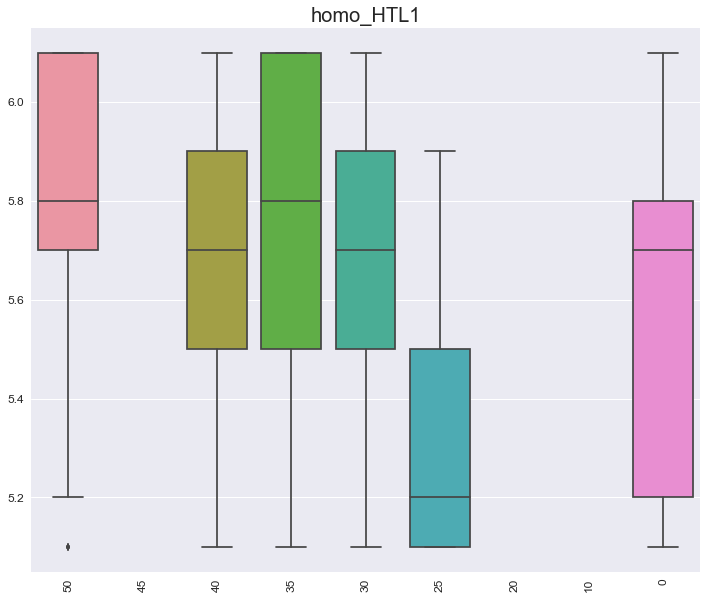

In [85]:
def layer(name): 
    column = name
    HTL = {'50': device50[column], '45': device45[column] , '40': device40[column] , '35': device35[column] , 
           '30': device30[column] , '25': device25[column], '20': device20[column], '10': device20[column]
          , '0': device[column]}
    sequence = ['50', '45', '40', '35', '30', '25', '20', '10', '0']
    df = pd.DataFrame(data=HTL).reindex(columns=sequence)

    # boxplot
    f, ax = plt.subplots(figsize=(12, 10))
    fig = sns.boxplot(data=df)
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(name, fontsize=20);
    return df.describe()

layer('homo_HTL1')

,50,45,40,35,30,25,20,10,0
count,279.000000,0.0,13363.000000,1967.000000,18158.000000,4623.000000,0.0,0.0,6288.000000
mean,2.852760,NaN,2.767015,2.770442,2.794695,2.613798,NaN,NaN,2.763449
std,0.136094,NaN,0.218773,0.196021,0.207457,0.226581,NaN,NaN,0.214549
min,2.300000,NaN,2.300000,2.300000,2.300000,2.300000,NaN,NaN,2.300000
25%,2.800000,NaN,2.670000,2.670000,2.670000,2.300000,NaN,NaN,2.670000
50%,2.870000,NaN,2.870000,2.800000,2.870000,2.670000,NaN,NaN,2.870000
75%,2.940000,NaN,2.940000,2.940000,2.940000,2.870000,NaN,NaN,2.940000
max,3.000000,NaN,3.000000,3.000000,3.000000,3.000000,NaN,NaN,3.000000


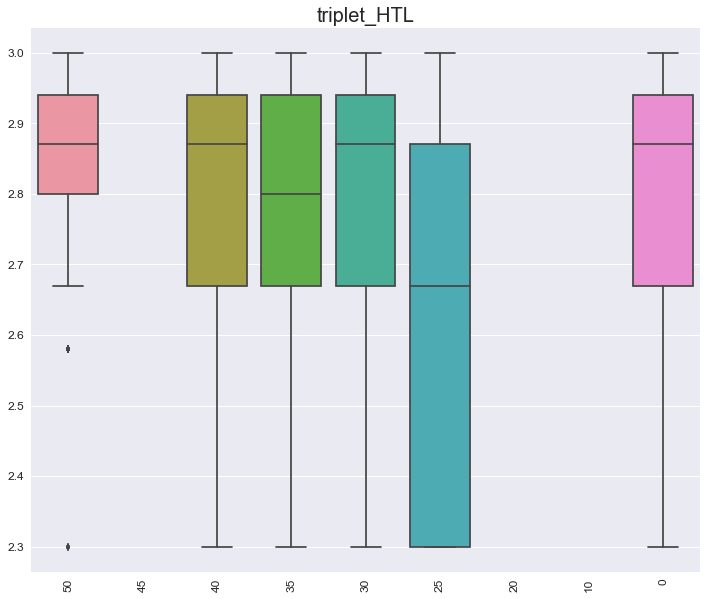

In [86]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,10,0
count,2.790000e+02,0.0,13363.000000,1967.000000,18158.000000,4623.000000,0.0,0.0,6288.000000
mean,3.470000e+00,NaN,2.819248,2.941484,2.726770,2.852038,NaN,NaN,3.091858
std,1.957504e-14,NaN,0.331568,0.444275,0.263617,0.237550,NaN,NaN,0.292264
min,3.470000e+00,NaN,2.260000,2.260000,2.260000,2.260000,NaN,NaN,2.800000
25%,3.470000e+00,NaN,2.600000,2.520000,2.520000,2.730000,NaN,NaN,2.800000
50%,3.470000e+00,NaN,2.730000,2.730000,2.700000,2.880000,NaN,NaN,3.000000
75%,3.470000e+00,NaN,2.910000,3.470000,2.880000,2.910000,NaN,NaN,3.500000
max,3.470000e+00,NaN,3.470000,3.470000,3.320000,3.320000,NaN,NaN,3.500000


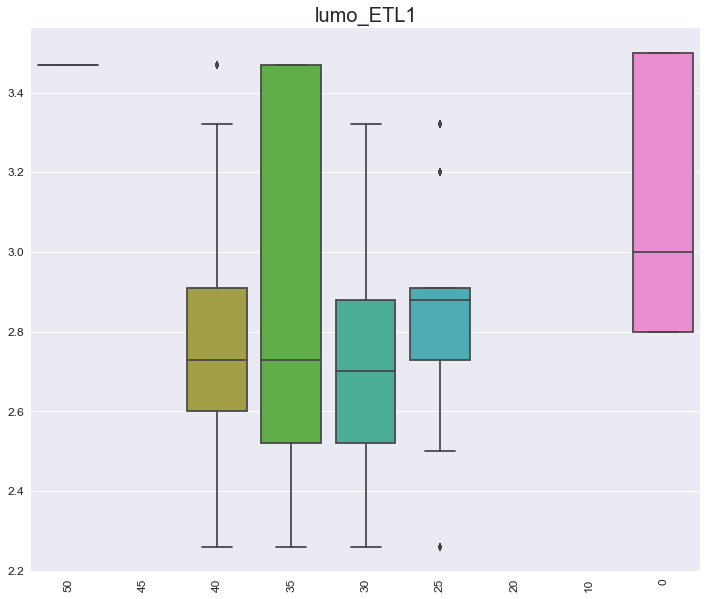

In [87]:
layer('lumo_ETL1')

,50,45,40,35,30,25,20,10,0
count,279.0,0.0,13363.000000,1967.000000,18158.000000,4623.000000,0.0,0.0,6288.000000
mean,7.5,NaN,6.555901,6.924443,6.465261,6.351159,NaN,NaN,6.523919
std,0.0,NaN,0.454145,0.512032,0.342210,0.327861,NaN,NaN,0.337301
min,7.5,NaN,5.850000,5.850000,5.850000,5.850000,NaN,NaN,6.200000
25%,7.5,NaN,6.130000,6.500000,6.130000,6.020000,NaN,NaN,6.200000
50%,7.5,NaN,6.560000,6.800000,6.500000,6.300000,NaN,NaN,6.400000
75%,7.5,NaN,6.800000,7.500000,6.790000,6.670000,NaN,NaN,7.000000
max,7.5,NaN,7.500000,7.500000,7.000000,7.000000,NaN,NaN,7.000000


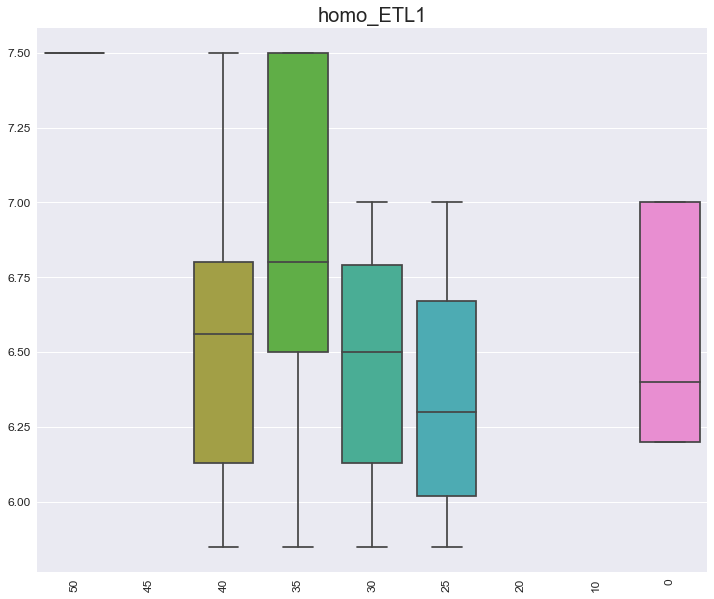

In [88]:
layer('homo_ETL1')

,50,45,40,35,30,25,20,10,0
count,2.790000e+02,0.0,13363.000000,1967.000000,18158.000000,4623.000000,0.0,0.0,6288.000000
mean,2.990000e+00,NaN,2.851708,2.957717,2.846172,2.769176,NaN,NaN,2.566285
std,7.118195e-15,NaN,0.216079,0.239498,0.233725,0.105177,NaN,NaN,0.047277
min,2.990000e+00,NaN,2.690000,2.690000,2.690000,2.690000,NaN,NaN,2.500000
25%,2.990000e+00,NaN,2.700000,2.740000,2.700000,2.700000,NaN,NaN,2.500000
50%,2.990000e+00,NaN,2.750000,2.990000,2.750000,2.750000,NaN,NaN,2.600000
75%,2.990000e+00,NaN,2.950000,2.990000,2.800000,2.760000,NaN,NaN,2.600000
max,2.990000e+00,NaN,3.400000,3.400000,3.400000,3.400000,NaN,NaN,2.600000


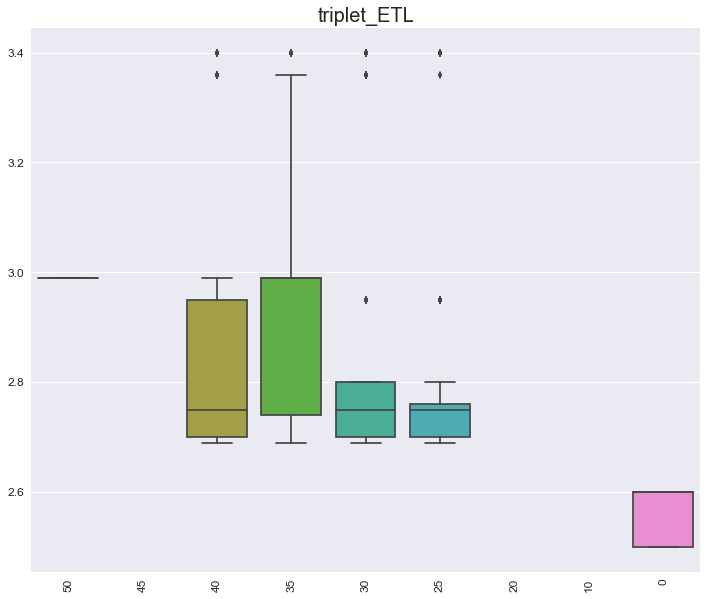

In [89]:
layer('triplet_ETL')

,50,45,40,35,30,25,20,10,0
count,208.000000,0.0,11331.000000,1393.000000,15058.000000,4641.000000,0.0,0.0,5721.000000
mean,2.415000,NaN,2.418749,2.429160,2.418278,2.417929,NaN,NaN,2.418039
std,0.233803,NaN,0.251852,0.216376,0.260243,0.225945,NaN,NaN,0.257128
min,2.020000,NaN,2.020000,2.020000,2.020000,2.020000,NaN,NaN,2.020000
25%,2.295000,NaN,2.280000,2.300000,2.280000,2.280000,NaN,NaN,2.270000
50%,2.400000,NaN,2.400000,2.400000,2.400000,2.400000,NaN,NaN,2.300000
75%,2.460000,NaN,2.460000,2.460000,2.460000,2.550000,NaN,NaN,2.460000
max,3.000000,NaN,3.000000,3.000000,3.000000,3.000000,NaN,NaN,3.000000


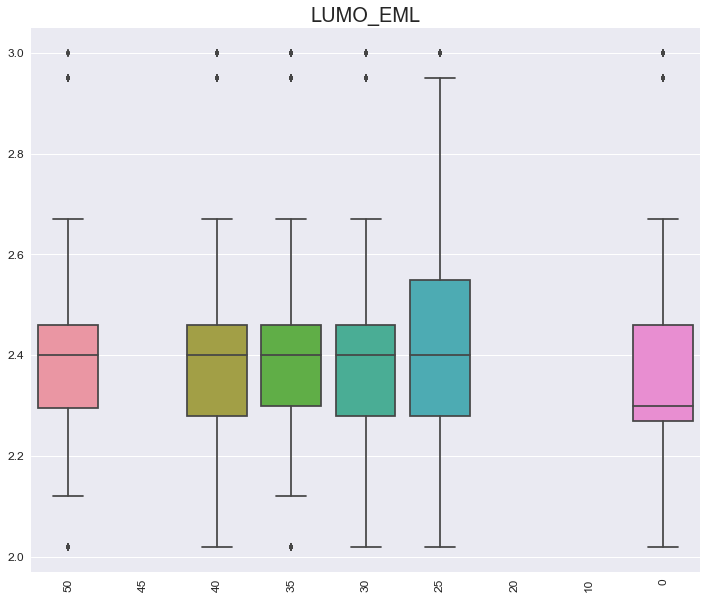

In [70]:
layer('LUMO_EML')

,50,45,40,35,30,25,20,10,0
count,208.000000,0.0,11331.000000,1393.000000,15058.000000,4641.000000,0.0,0.0,5721.000000
mean,6.115048,NaN,5.908400,6.315800,5.886292,5.843469,NaN,NaN,5.809995
std,0.689318,NaN,0.421206,0.791562,0.397345,0.111418,NaN,NaN,0.148121
min,5.560000,NaN,5.560000,5.560000,5.560000,5.560000,NaN,NaN,5.560000
25%,5.700000,NaN,5.710000,5.710000,5.700000,5.800000,NaN,NaN,5.700000
50%,5.825000,NaN,5.850000,5.900000,5.800000,5.900000,NaN,NaN,5.800000
75%,6.060000,NaN,5.900000,7.500000,5.900000,5.900000,NaN,NaN,5.900000
max,7.500000,NaN,7.500000,7.500000,7.500000,6.060000,NaN,NaN,7.500000


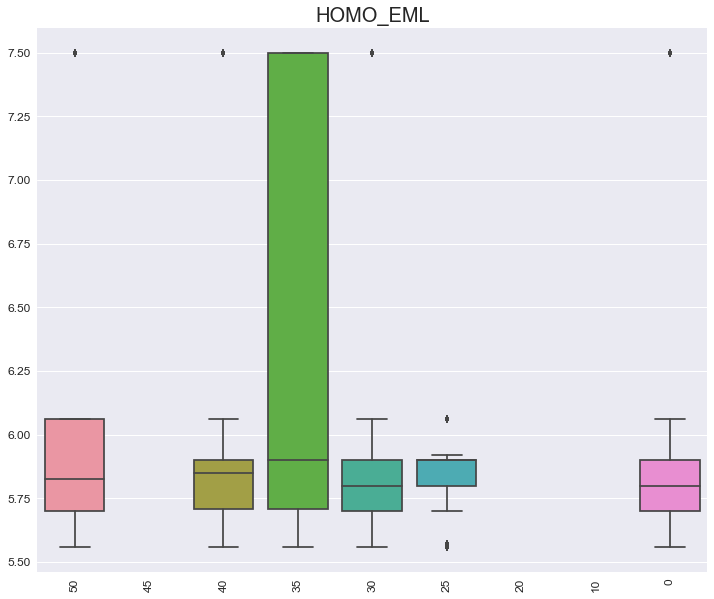

In [71]:
layer('HOMO_EML')

In [90]:
triplet29 = new_X.loc[new_X['triplet_HOST'] == 2.85]
print(triplet29.shape)
device50 = triplet29.loc[triplet29['cd/a'] > 50]
device45 = triplet29.loc[(triplet29['cd/a'] >= 45) & (new_X['cd/a'] < 45)]
device40 = triplet29.loc[(triplet29['cd/a'] >= 40) & (new_X['cd/a'] < 50)]
device35 = triplet29.loc[(triplet29['cd/a'] >= 35) & (new_X['cd/a'] < 40)]
device30 = triplet29.loc[(triplet29['cd/a'] >= 30) & (new_X['cd/a'] < 35)]
device25 = triplet29.loc[(triplet29['cd/a'] >= 25) & (new_X['cd/a'] < 30)]
device20 = triplet29.loc[(triplet29['cd/a'] >= 20) & (new_X['cd/a'] < 25)]
device10 = triplet29.loc[(triplet29['cd/a'] >= 10) & (new_X['cd/a'] < 20)]
device = triplet29.loc[triplet29['cd/a'] < 10]
device50.shape

(38760, 32)


(208, 32)

,50,45,40,35,30,25,20,10,0
count,208.000000,0.0,11331.000000,1393.000000,15058.000000,4641.000000,0.0,0.0,5721.000000
mean,2.340000,NaN,2.260369,2.275147,2.285488,2.150692,NaN,NaN,2.255616
std,0.115771,NaN,0.197004,0.192798,0.164080,0.265657,NaN,NaN,0.199982
min,1.900000,NaN,1.900000,1.900000,1.900000,1.900000,NaN,NaN,1.900000
25%,2.260000,NaN,2.200000,2.200000,2.200000,1.900000,NaN,NaN,2.000000
50%,2.400000,NaN,2.400000,2.400000,2.400000,2.000000,NaN,NaN,2.260000
75%,2.400000,NaN,2.400000,2.400000,2.400000,2.500000,NaN,NaN,2.400000
max,2.500000,NaN,2.500000,2.500000,2.500000,2.500000,NaN,NaN,2.500000


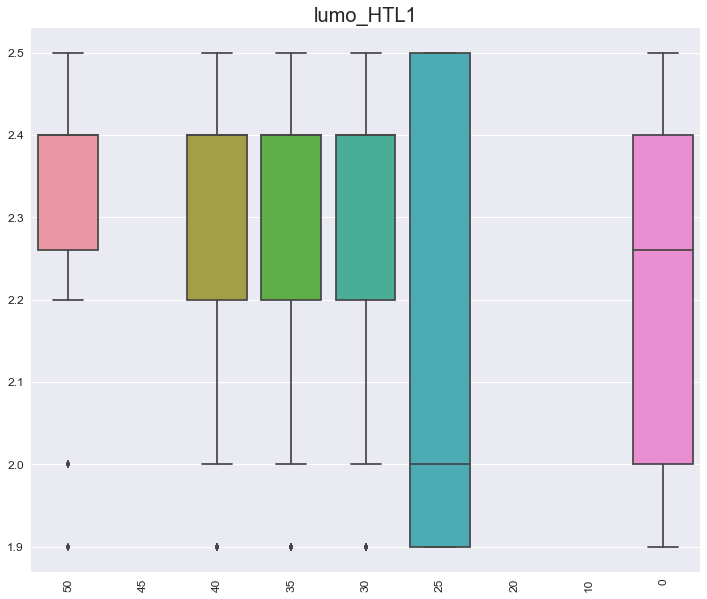

In [91]:
levels = ['lumo_HTL1', 'homo_HTL1', 'triplet_HTL', 'lumo_ETL1', 'homo_ETL1', 'triplet_ETL', 'LUMO_EML', 'HOMO_EML']
# for level in levels:
#     layer(level)
layer('lumo_HTL1')


,50,45,40,35,30,25,20,10,0
count,208.000000,0.0,11331.000000,1393.000000,15058.000000,4641.000000,0.0,0.0,5721.000000
mean,5.850962,NaN,5.632477,5.688011,5.718044,5.275695,NaN,NaN,5.621412
std,0.246128,NaN,0.317202,0.347228,0.268128,0.212121,NaN,NaN,0.319776
min,5.100000,NaN,5.100000,5.100000,5.100000,5.100000,NaN,NaN,5.100000
25%,5.700000,NaN,5.500000,5.500000,5.700000,5.100000,NaN,NaN,5.200000
50%,5.850000,NaN,5.700000,5.700000,5.700000,5.200000,NaN,NaN,5.700000
75%,6.100000,NaN,5.900000,6.100000,5.900000,5.500000,NaN,NaN,5.800000
max,6.100000,NaN,6.100000,6.100000,6.100000,5.900000,NaN,NaN,6.100000


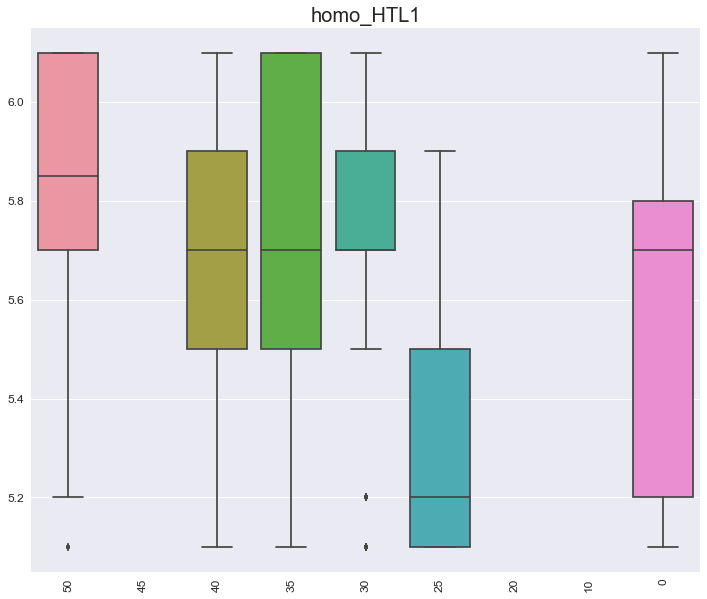

In [93]:
layer('homo_HTL1')

,50,45,40,35,30,25,20,10,0
count,208.000000,0.0,11331.000000,1393.000000,15058.000000,4641.000000,0.0,0.0,5721.000000
mean,2.849183,NaN,2.767309,2.756698,2.806063,2.607024,NaN,NaN,2.760603
std,0.135888,NaN,0.218916,0.206333,0.197130,0.231915,NaN,NaN,0.220186
min,2.300000,NaN,2.300000,2.300000,2.300000,2.300000,NaN,NaN,2.300000
25%,2.800000,NaN,2.670000,2.670000,2.670000,2.300000,NaN,NaN,2.580000
50%,2.870000,NaN,2.870000,2.800000,2.870000,2.670000,NaN,NaN,2.800000
75%,2.940000,NaN,2.940000,2.940000,2.940000,2.870000,NaN,NaN,2.940000
max,3.000000,NaN,3.000000,3.000000,3.000000,3.000000,NaN,NaN,3.000000


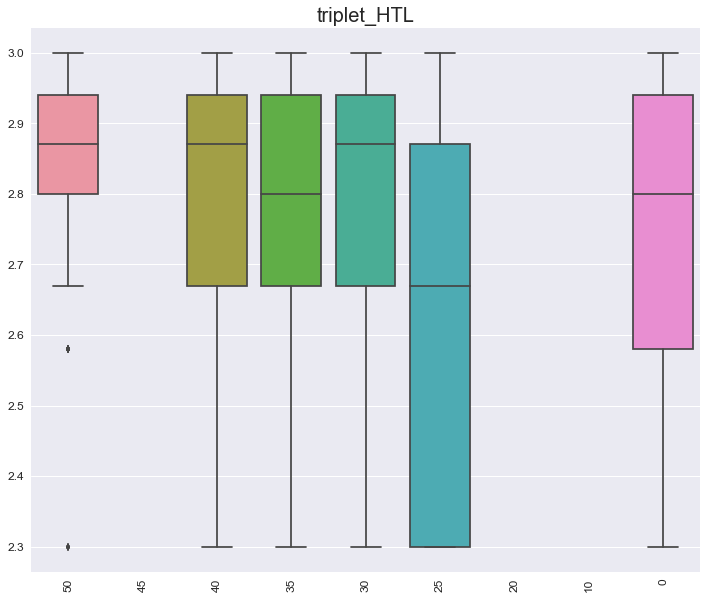

In [94]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,10,0
count,2.080000e+02,0.0,11331.000000,1393.000000,15058.000000,4641.000000,0.0,0.0,5721.000000
mean,3.470000e+00,NaN,2.817666,3.053618,2.722828,2.833874,NaN,NaN,3.097675
std,1.736126e-14,NaN,0.330414,0.445318,0.261943,0.246705,NaN,NaN,0.293805
min,3.470000e+00,NaN,2.260000,2.260000,2.260000,2.260000,NaN,NaN,2.800000
25%,3.470000e+00,NaN,2.600000,2.600000,2.520000,2.700000,NaN,NaN,2.800000
50%,3.470000e+00,NaN,2.730000,3.320000,2.700000,2.880000,NaN,NaN,3.000000
75%,3.470000e+00,NaN,2.910000,3.470000,2.880000,2.910000,NaN,NaN,3.500000
max,3.470000e+00,NaN,3.470000,3.470000,3.320000,3.320000,NaN,NaN,3.500000


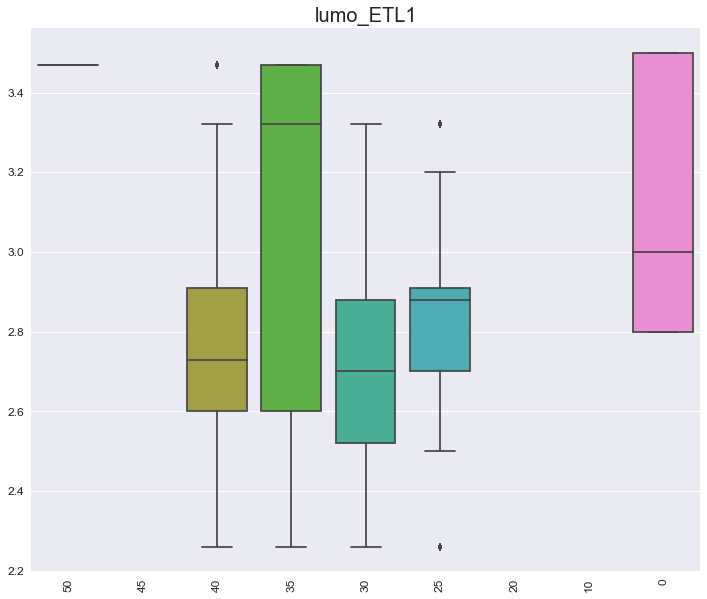

In [95]:
layer('lumo_ETL1')

,50,45,40,35,30,25,20,10,0
count,208.0,0.0,11331.000000,1393.00000,15058.000000,4641.000000,0.0,0.0,5721.000000
mean,7.5,NaN,6.553605,7.05323,6.471328,6.350440,NaN,NaN,6.530641
std,0.0,NaN,0.452305,0.49069,0.341516,0.327293,NaN,NaN,0.339209
min,7.5,NaN,5.850000,5.85000,5.850000,5.850000,NaN,NaN,6.200000
25%,7.5,NaN,6.130000,6.79000,6.130000,6.020000,NaN,NaN,6.200000
50%,7.5,NaN,6.560000,7.00000,6.500000,6.300000,NaN,NaN,6.400000
75%,7.5,NaN,6.800000,7.50000,6.790000,6.670000,NaN,NaN,7.000000
max,7.5,NaN,7.500000,7.50000,7.000000,7.000000,NaN,NaN,7.000000


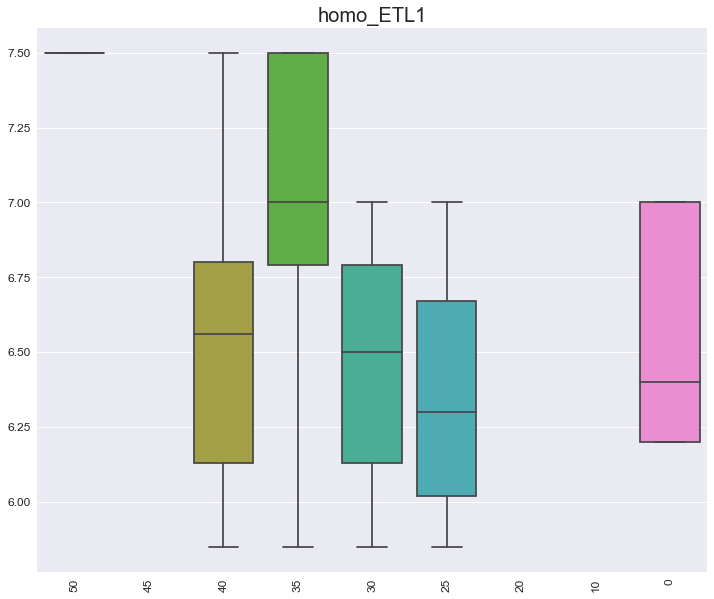

In [96]:
layer('homo_ETL1')

,50,45,40,35,30,25,20,10,0
count,2.080000e+02,0.0,11331.000000,1393.000000,15058.000000,4641.000000,0.0,0.0,5721.000000
mean,2.990000e+00,NaN,2.851371,2.972498,2.850043,2.772428,NaN,NaN,2.566544
std,6.677409e-15,NaN,0.216236,0.216661,0.238041,0.115081,NaN,NaN,0.047188
min,2.990000e+00,NaN,2.690000,2.690000,2.690000,2.690000,NaN,NaN,2.500000
25%,2.990000e+00,NaN,2.700000,2.760000,2.700000,2.700000,NaN,NaN,2.500000
50%,2.990000e+00,NaN,2.750000,2.990000,2.750000,2.750000,NaN,NaN,2.600000
75%,2.990000e+00,NaN,2.950000,2.990000,2.800000,2.760000,NaN,NaN,2.600000
max,2.990000e+00,NaN,3.400000,3.400000,3.400000,3.400000,NaN,NaN,2.600000


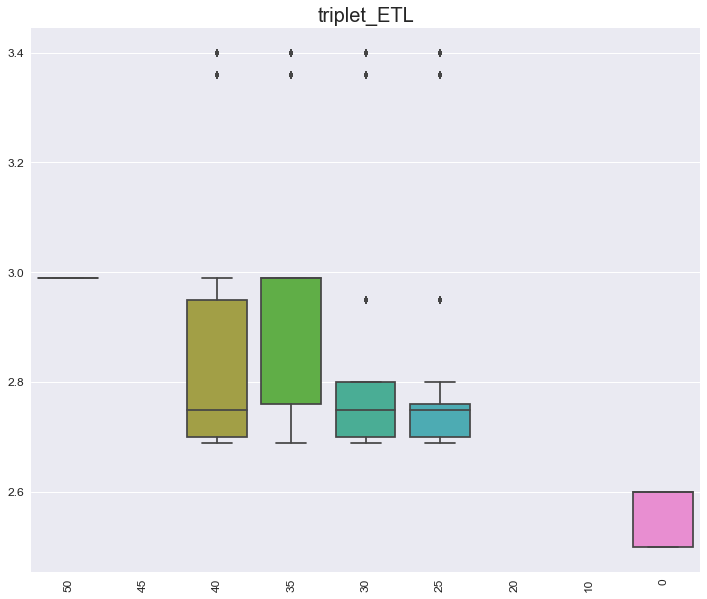

In [97]:
layer('triplet_ETL')

,50,45,40,35,30,25,20,10,0
count,208.000000,0.0,11331.000000,1393.000000,15058.000000,4641.000000,0.0,0.0,5721.000000
mean,2.415000,NaN,2.418749,2.429160,2.418278,2.417929,NaN,NaN,2.418039
std,0.233803,NaN,0.251852,0.216376,0.260243,0.225945,NaN,NaN,0.257128
min,2.020000,NaN,2.020000,2.020000,2.020000,2.020000,NaN,NaN,2.020000
25%,2.295000,NaN,2.280000,2.300000,2.280000,2.280000,NaN,NaN,2.270000
50%,2.400000,NaN,2.400000,2.400000,2.400000,2.400000,NaN,NaN,2.300000
75%,2.460000,NaN,2.460000,2.460000,2.460000,2.550000,NaN,NaN,2.460000
max,3.000000,NaN,3.000000,3.000000,3.000000,3.000000,NaN,NaN,3.000000


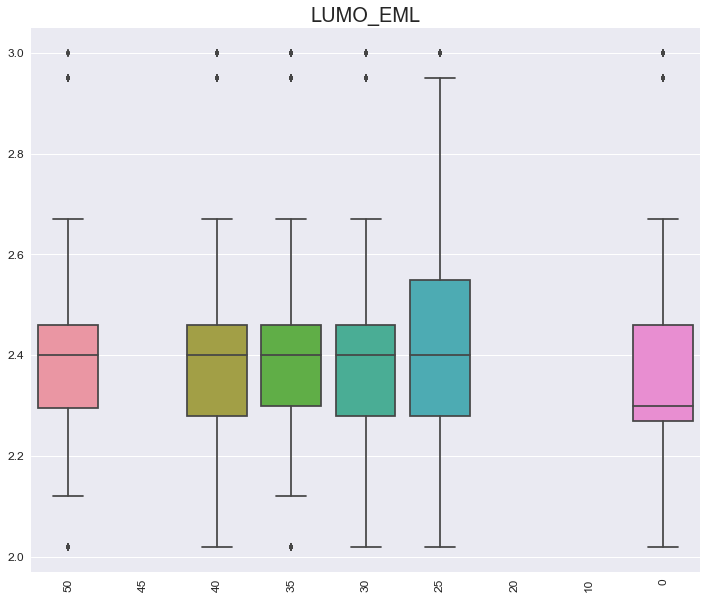

In [98]:
layer('LUMO_EML')

,50,45,40,35,30,25,20,10,0
count,217.000000,0.0,11995.000000,1307.000000,15726.000000,5311.000000,0.0,0.0,6088.000000
mean,6.091751,NaN,5.890067,6.297276,5.874660,5.819757,NaN,NaN,5.795913
std,0.684380,NaN,0.416529,0.787919,0.403007,0.127830,NaN,NaN,0.154404
min,5.560000,NaN,5.560000,5.560000,5.560000,5.560000,NaN,NaN,5.560000
25%,5.700000,NaN,5.700000,5.710000,5.700000,5.800000,NaN,NaN,5.700000
50%,5.800000,NaN,5.800000,5.900000,5.800000,5.860000,NaN,NaN,5.800000
75%,6.060000,NaN,5.900000,7.500000,5.900000,5.900000,NaN,NaN,5.900000
max,7.500000,NaN,7.500000,7.500000,7.500000,6.060000,NaN,NaN,7.500000


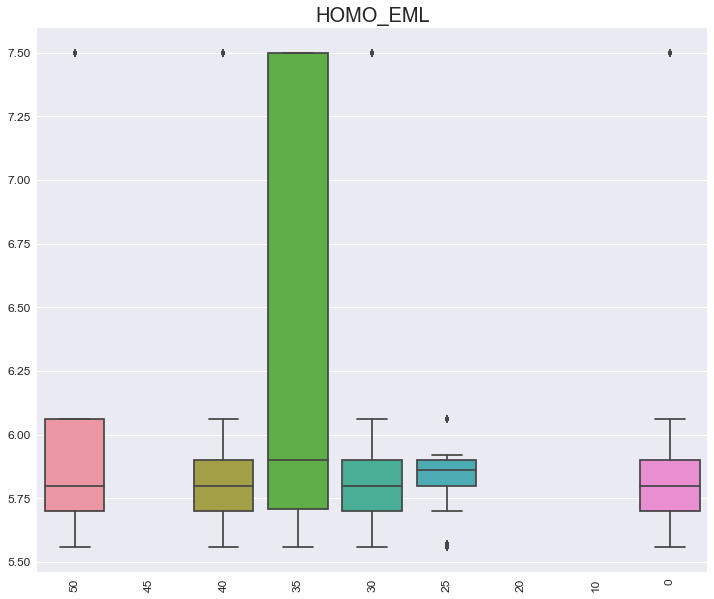

In [82]:
layer('HOMO_EML')

In [99]:
triplet29 = new_X.loc[new_X['triplet_HOST'] == 2.8]
print(triplet29.shape)
device50 = triplet29.loc[triplet29['cd/a'] > 50]
device45 = triplet29.loc[(triplet29['cd/a'] >= 45) & (new_X['cd/a'] < 45)]
device40 = triplet29.loc[(triplet29['cd/a'] >= 40) & (new_X['cd/a'] < 50)]
device35 = triplet29.loc[(triplet29['cd/a'] >= 35) & (new_X['cd/a'] < 40)]
device30 = triplet29.loc[(triplet29['cd/a'] >= 30) & (new_X['cd/a'] < 35)]
device25 = triplet29.loc[(triplet29['cd/a'] >= 25) & (new_X['cd/a'] < 30)]
device20 = triplet29.loc[(triplet29['cd/a'] >= 20) & (new_X['cd/a'] < 25)]
device10 = triplet29.loc[(triplet29['cd/a'] >= 10) & (new_X['cd/a'] < 20)]
device = triplet29.loc[triplet29['cd/a'] < 10]
device50.shape

(41040, 32)


(217, 32)

,50,45,40,35,30,25,20,10,0
count,217.000000,0.0,11995.000000,1307.000000,15726.000000,5311.00000,0.0,0.0,6088.000000
mean,2.344608,NaN,2.260337,2.261729,2.289842,2.15071,NaN,NaN,2.255894
std,0.111326,NaN,0.196945,0.201747,0.161150,0.26105,NaN,NaN,0.199876
min,1.900000,NaN,1.900000,1.900000,1.900000,1.90000,NaN,NaN,1.900000
25%,2.260000,NaN,2.200000,2.100000,2.200000,1.90000,NaN,NaN,2.000000
50%,2.400000,NaN,2.400000,2.400000,2.400000,2.00000,NaN,NaN,2.260000
75%,2.400000,NaN,2.400000,2.400000,2.400000,2.50000,NaN,NaN,2.400000
max,2.500000,NaN,2.500000,2.500000,2.500000,2.50000,NaN,NaN,2.500000


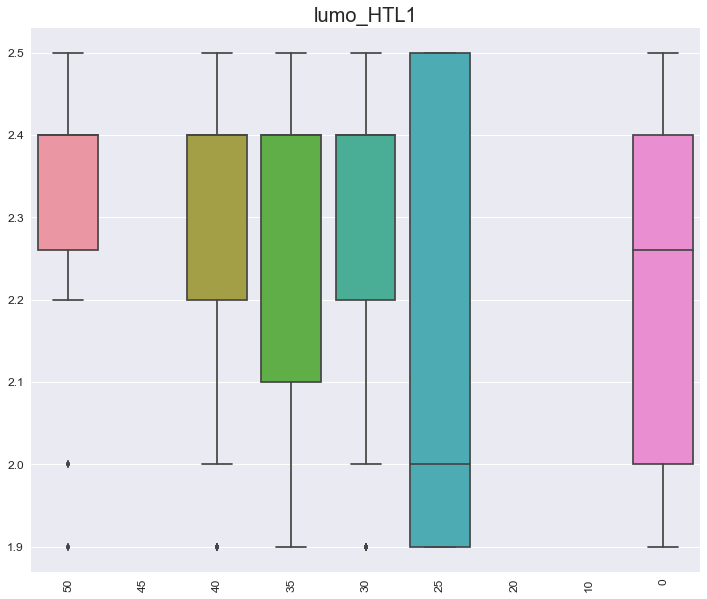

In [100]:
layer('lumo_HTL1')

,50,45,40,35,30,25,20,10,0
count,217.000000,0.0,11995.000000,1307.000000,15726.000000,5311.000000,0.0,0.0,6088.000000
mean,5.856221,NaN,5.632614,5.650191,5.725016,5.295895,NaN,NaN,5.621978
std,0.243566,NaN,0.317260,0.348995,0.266607,0.228880,NaN,NaN,0.319736
min,5.100000,NaN,5.100000,5.100000,5.100000,5.100000,NaN,NaN,5.100000
25%,5.700000,NaN,5.500000,5.200000,5.700000,5.100000,NaN,NaN,5.200000
50%,5.900000,NaN,5.700000,5.700000,5.700000,5.200000,NaN,NaN,5.700000
75%,6.100000,NaN,5.900000,5.900000,5.900000,5.500000,NaN,NaN,5.800000
max,6.100000,NaN,6.100000,6.100000,6.100000,6.100000,NaN,NaN,6.100000


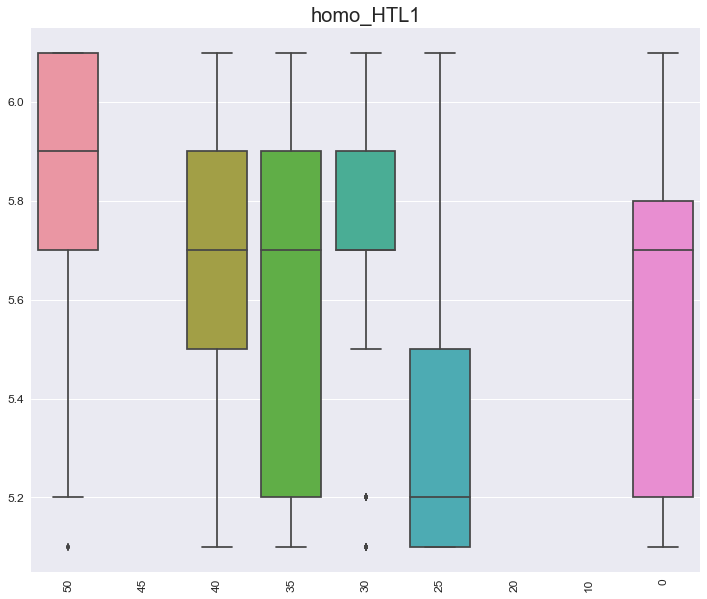

In [101]:
layer('homo_HTL1')

,50,45,40,35,30,25,20,10,0
count,217.000000,0.0,11995.000000,1307.000000,15726.000000,5311.000000,0.0,0.0,6088.000000
mean,2.852258,NaN,2.767043,2.745073,2.807177,2.620495,NaN,NaN,2.760958
std,0.133298,NaN,0.218902,0.212621,0.196902,0.233093,NaN,NaN,0.220193
min,2.300000,NaN,2.300000,2.300000,2.300000,2.300000,NaN,NaN,2.300000
25%,2.800000,NaN,2.670000,2.670000,2.670000,2.300000,NaN,NaN,2.580000
50%,2.870000,NaN,2.870000,2.800000,2.870000,2.670000,NaN,NaN,2.800000
75%,2.940000,NaN,2.940000,2.940000,2.940000,2.870000,NaN,NaN,2.940000
max,3.000000,NaN,3.000000,3.000000,3.000000,3.000000,NaN,NaN,3.000000


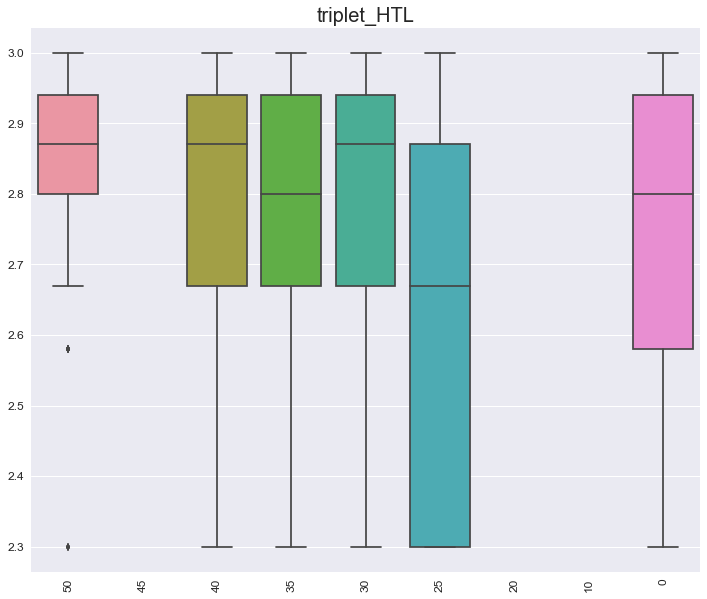

In [102]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,10,0
count,2.170000e+02,0.0,11995.000000,1307.000000,15726.000000,5311.000000,0.0,0.0,6088.000000
mean,3.470000e+00,NaN,2.817528,3.116863,2.718711,2.834248,NaN,NaN,3.098111
std,1.780464e-14,NaN,0.330313,0.438041,0.262514,0.241657,NaN,NaN,0.293903
min,3.470000e+00,NaN,2.260000,2.260000,2.260000,2.260000,NaN,NaN,2.800000
25%,3.470000e+00,NaN,2.600000,2.600000,2.520000,2.700000,NaN,NaN,2.800000
50%,3.470000e+00,NaN,2.730000,3.470000,2.700000,2.880000,NaN,NaN,3.000000
75%,3.470000e+00,NaN,2.910000,3.470000,2.880000,2.910000,NaN,NaN,3.500000
max,3.470000e+00,NaN,3.470000,3.470000,3.320000,3.320000,NaN,NaN,3.500000


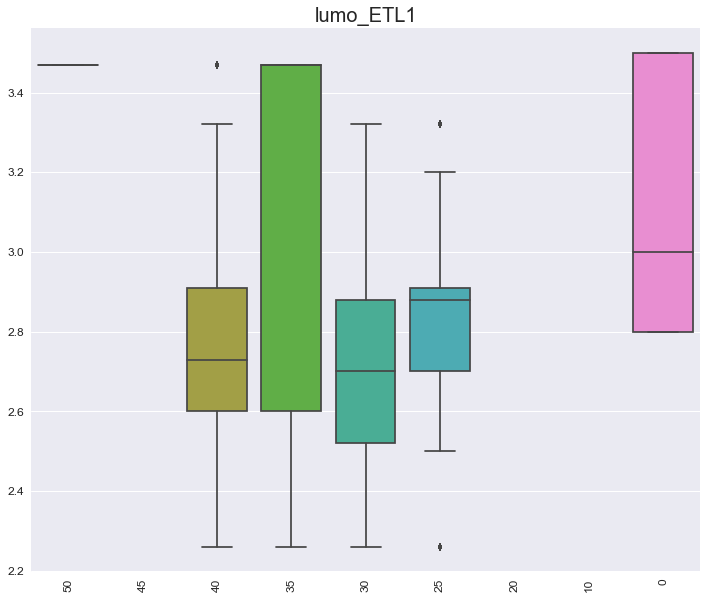

In [103]:
layer('lumo_ETL1')

,50,45,40,35,30,25,20,10,0
count,217.0,0.0,11995.000000,1307.000000,15726.000000,5311.000000,0.0,0.0,6088.000000
mean,7.5,NaN,6.553406,7.137077,6.478146,6.339241,NaN,NaN,6.531143
std,0.0,NaN,0.452142,0.452968,0.340647,0.324289,NaN,NaN,0.339332
min,7.5,NaN,5.850000,5.850000,5.850000,5.850000,NaN,NaN,6.200000
25%,7.5,NaN,6.130000,6.800000,6.130000,6.020000,NaN,NaN,6.200000
50%,7.5,NaN,6.560000,7.500000,6.500000,6.300000,NaN,NaN,6.400000
75%,7.5,NaN,6.800000,7.500000,6.790000,6.560000,NaN,NaN,7.000000
max,7.5,NaN,7.500000,7.500000,7.000000,7.000000,NaN,NaN,7.000000


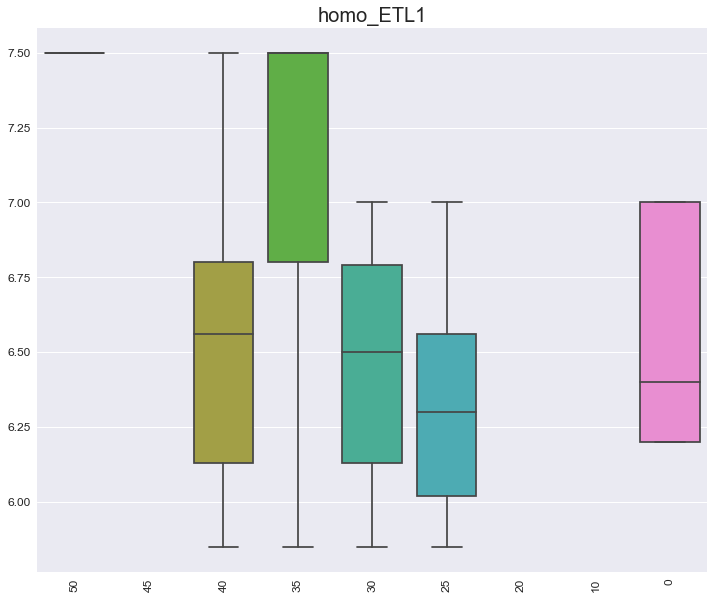

In [104]:
layer('homo_ETL1')

,50,45,40,35,30,25,20,10,0
count,217.000000,0.0,11995.000000,1307.000000,15726.000000,5311.000000,0.0,0.0,6088.000000
mean,2.403594,NaN,2.402630,2.406549,2.403904,2.395283,NaN,NaN,2.400386
std,0.240461,NaN,0.254034,0.212042,0.262397,0.231901,NaN,NaN,0.259096
min,2.020000,NaN,2.020000,2.020000,2.020000,2.020000,NaN,NaN,2.020000
25%,2.280000,NaN,2.270000,2.300000,2.270000,2.270000,NaN,NaN,2.270000
50%,2.400000,NaN,2.400000,2.400000,2.300000,2.300000,NaN,NaN,2.300000
75%,2.460000,NaN,2.460000,2.460000,2.460000,2.460000,NaN,NaN,2.460000
max,3.000000,NaN,3.000000,3.000000,3.000000,3.000000,NaN,NaN,3.000000


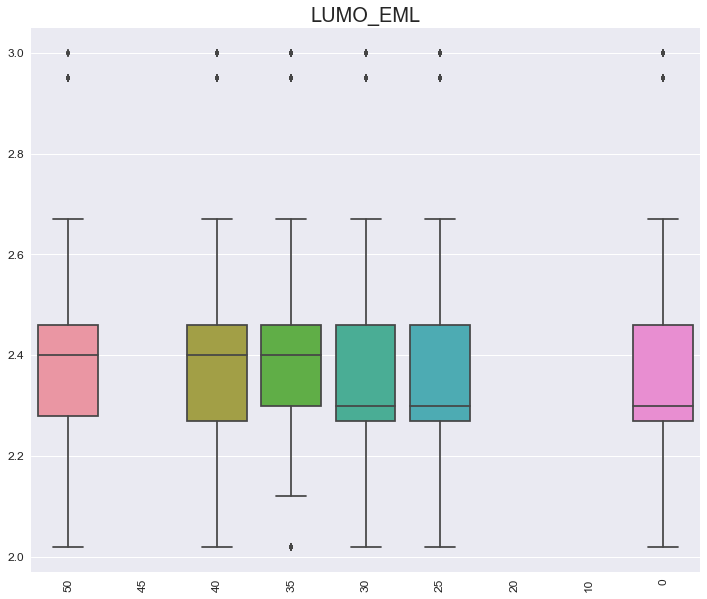

In [105]:
layer('LUMO_EML')

,50,45,40,35,30,25,20,10,0
count,217.000000,0.0,11995.000000,1307.000000,15726.000000,5311.000000,0.0,0.0,6088.000000
mean,6.091751,NaN,5.890067,6.297276,5.874660,5.819757,NaN,NaN,5.795913
std,0.684380,NaN,0.416529,0.787919,0.403007,0.127830,NaN,NaN,0.154404
min,5.560000,NaN,5.560000,5.560000,5.560000,5.560000,NaN,NaN,5.560000
25%,5.700000,NaN,5.700000,5.710000,5.700000,5.800000,NaN,NaN,5.700000
50%,5.800000,NaN,5.800000,5.900000,5.800000,5.860000,NaN,NaN,5.800000
75%,6.060000,NaN,5.900000,7.500000,5.900000,5.900000,NaN,NaN,5.900000
max,7.500000,NaN,7.500000,7.500000,7.500000,6.060000,NaN,NaN,7.500000


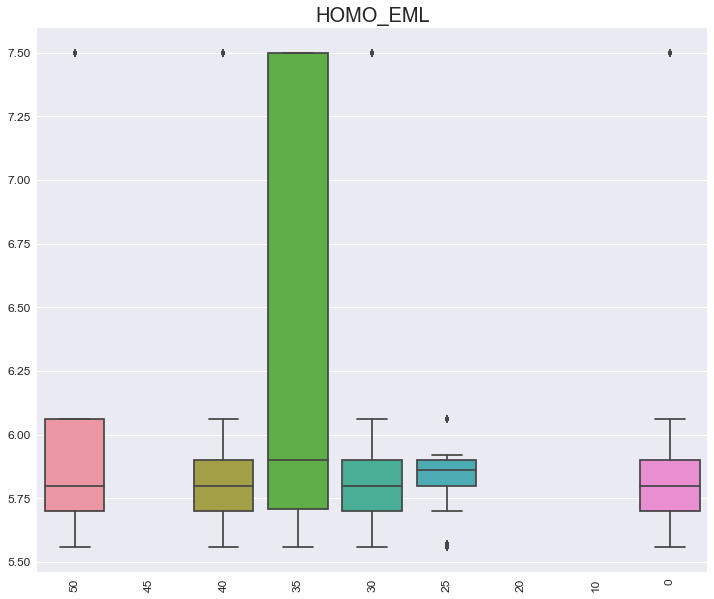

In [106]:
layer('HOMO_EML')

In [108]:
triplet29 = new_X.loc[new_X['triplet_HOST'] == 2.75]
print(triplet29.shape)
device50 = triplet29.loc[triplet29['cd/a'] > 50]
device45 = triplet29.loc[(triplet29['cd/a'] >= 45) & (new_X['cd/a'] < 45)]
device40 = triplet29.loc[(triplet29['cd/a'] >= 40) & (new_X['cd/a'] < 50)]
device35 = triplet29.loc[(triplet29['cd/a'] >= 35) & (new_X['cd/a'] < 40)]
device30 = triplet29.loc[(triplet29['cd/a'] >= 30) & (new_X['cd/a'] < 35)]
device25 = triplet29.loc[(triplet29['cd/a'] >= 25) & (new_X['cd/a'] < 30)]
device20 = triplet29.loc[(triplet29['cd/a'] >= 20) & (new_X['cd/a'] < 25)]
device10 = triplet29.loc[(triplet29['cd/a'] >= 10) & (new_X['cd/a'] < 20)]
device = triplet29.loc[triplet29['cd/a'] < 10]
device50.shape

(38760, 32)


(40, 32)

,50,45,40,35,30,25,20,10,0
count,40.000000,0.0,7543.000000,4654.000000,4406.000000,15366.000000,631.000000,631.000000,5648.000000
mean,2.257500,NaN,2.296625,2.194061,2.335279,2.240171,2.136609,2.136609,2.254387
std,0.201644,NaN,0.158509,0.238033,0.125303,0.205147,0.289182,0.289182,0.200322
min,1.900000,NaN,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000
25%,2.150000,NaN,2.200000,2.000000,2.260000,2.000000,1.900000,1.900000,2.000000
50%,2.330000,NaN,2.400000,2.200000,2.400000,2.260000,1.900000,1.900000,2.260000
75%,2.400000,NaN,2.400000,2.400000,2.400000,2.400000,2.500000,2.500000,2.400000
max,2.500000,NaN,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000


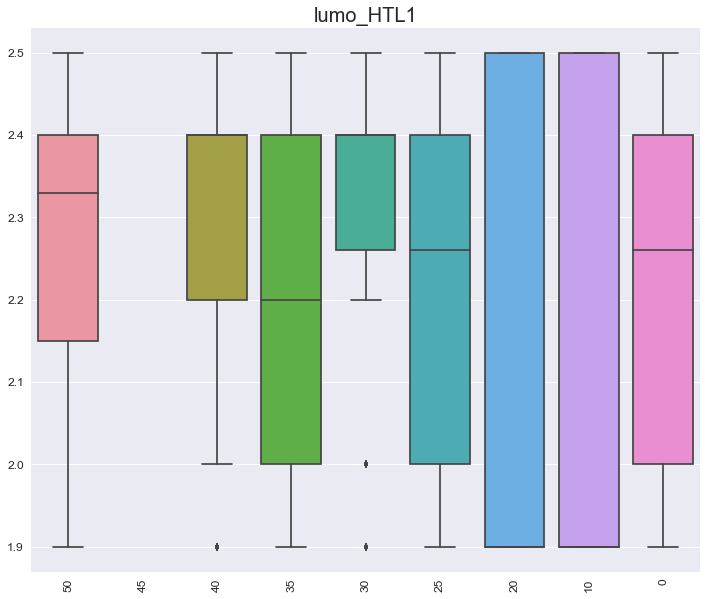

In [109]:
levels = ['lumo_HTL1', 'homo_HTL1', 'triplet_HTL', 'lumo_ETL1', 'homo_ETL1', 'triplet_ETL', 'LUMO_EML', 'HOMO_EML']

layer('lumo_HTL1')

,50,45,40,35,30,25,20,10,0
count,40.000000,0.0,7543.000000,4654.000000,4406.000000,15366.000000,631.000000,631.000000,5648.000000
mean,5.625000,NaN,5.741694,5.436162,5.852701,5.578784,5.158320,5.158320,5.617688
std,0.323245,NaN,0.269057,0.303141,0.242313,0.303536,0.096887,0.096887,0.318672
min,5.100000,NaN,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000
25%,5.425000,NaN,5.700000,5.200000,5.700000,5.200000,5.100000,5.100000,5.200000
50%,5.700000,NaN,5.700000,5.500000,5.900000,5.700000,5.100000,5.100000,5.700000
75%,5.825000,NaN,5.900000,5.700000,6.100000,5.800000,5.200000,5.200000,5.800000
max,6.100000,NaN,6.100000,6.100000,6.100000,6.100000,5.800000,5.800000,6.100000


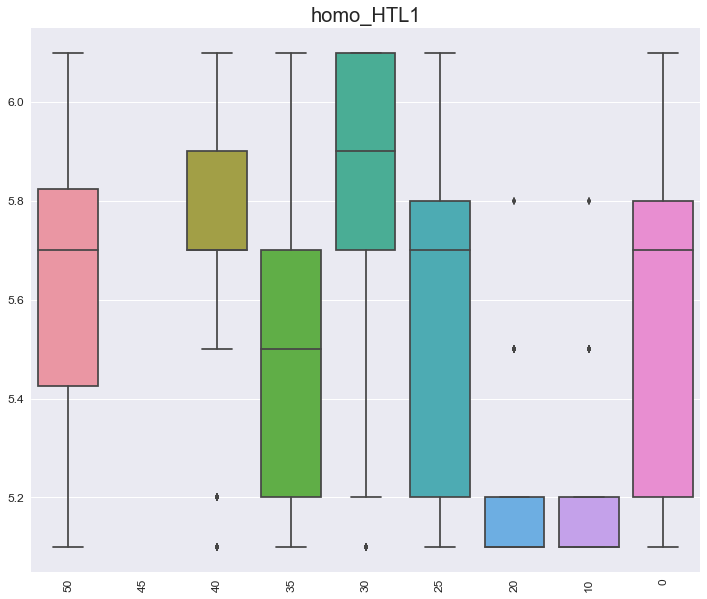

In [110]:
layer('homo_HTL1')

,50,45,40,35,30,25,20,10,0
count,40.000000,0.0,7543.000000,4654.000000,4406.000000,15366.000000,631.000000,631.000000,5648.000000
mean,2.762500,NaN,2.815884,2.676197,2.845057,2.748091,2.535325,2.535325,2.759253
std,0.223076,NaN,0.190510,0.237112,0.151177,0.228305,0.190598,0.190598,0.220732
min,2.300000,NaN,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000
25%,2.647500,NaN,2.800000,2.580000,2.800000,2.580000,2.300000,2.300000,2.580000
50%,2.835000,NaN,2.870000,2.670000,2.870000,2.870000,2.670000,2.670000,2.800000
75%,2.940000,NaN,2.940000,2.870000,2.940000,2.940000,2.670000,2.670000,2.940000
max,3.000000,NaN,3.000000,3.000000,3.000000,3.000000,2.870000,2.870000,3.000000


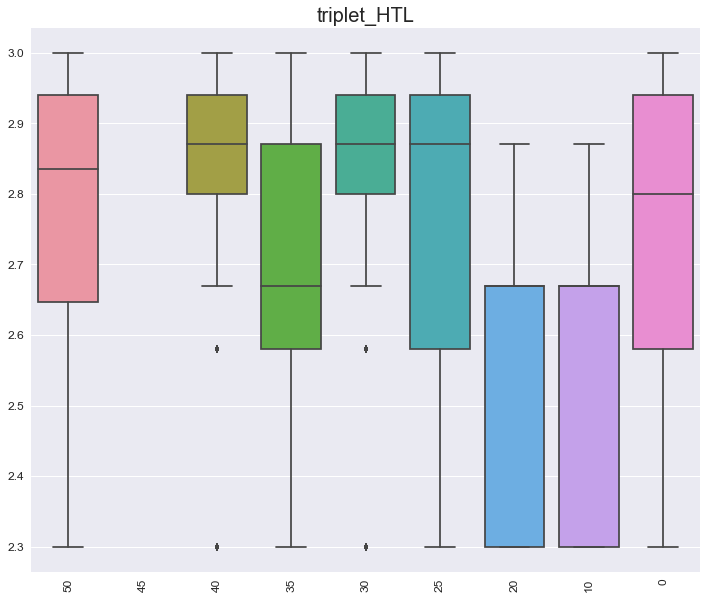

In [111]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,10,0
count,4.000000e+01,0.0,7543.000000,4654.000000,4406.000000,15366.000000,631.000000,631.000000,5648.000000
mean,3.470000e+00,NaN,2.769658,3.016859,2.640708,2.769360,2.894231,2.894231,3.095131
std,4.497466e-16,NaN,0.334456,0.346842,0.213150,0.269638,0.168180,0.168180,0.293087
min,3.470000e+00,NaN,2.260000,2.260000,2.260000,2.260000,2.260000,2.260000,2.800000
25%,3.470000e+00,NaN,2.520000,2.730000,2.500000,2.600000,2.880000,2.880000,2.800000
50%,3.470000e+00,NaN,2.700000,2.880000,2.600000,2.730000,2.880000,2.880000,3.000000
75%,3.470000e+00,NaN,2.880000,3.470000,2.730000,2.880000,2.910000,2.910000,3.500000
max,3.470000e+00,NaN,3.470000,3.470000,3.470000,3.320000,3.320000,3.320000,3.500000


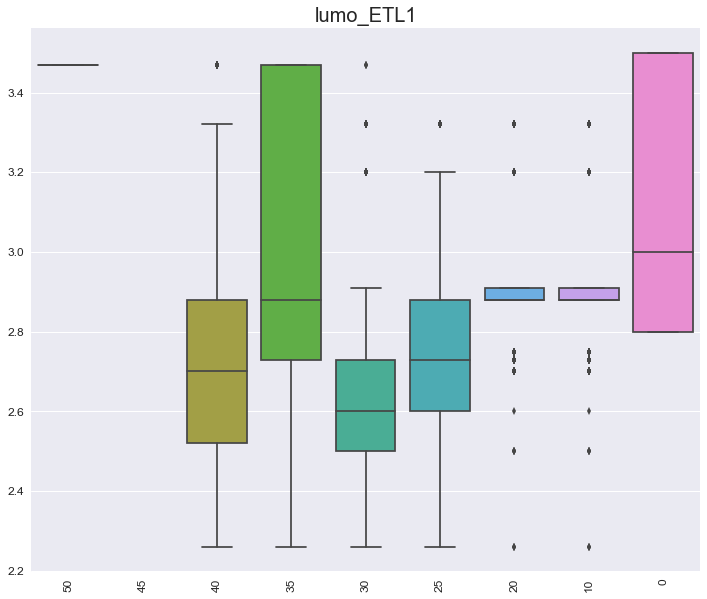

In [112]:
layer('lumo_ETL1')

,50,45,40,35,30,25,20,10,0
count,40.0,0.0,7543.000000,4654.000000,4406.000000,15366.000000,631.000000,631.000000,5648.000000
mean,7.5,NaN,6.578368,6.689572,6.584006,6.416979,6.280301,6.280301,6.527691
std,0.0,NaN,0.442414,0.572804,0.310782,0.342288,0.278291,0.278291,0.338328
min,7.5,NaN,5.850000,5.850000,5.850000,5.850000,5.850000,5.850000,6.200000
25%,7.5,NaN,6.130000,6.130000,6.500000,6.120000,6.020000,6.020000,6.200000
50%,7.5,NaN,6.670000,6.560000,6.790000,6.500000,6.130000,6.130000,6.400000
75%,7.5,NaN,6.800000,7.500000,6.800000,6.680000,6.560000,6.560000,7.000000
max,7.5,NaN,7.500000,7.500000,7.500000,7.000000,7.000000,7.000000,7.000000


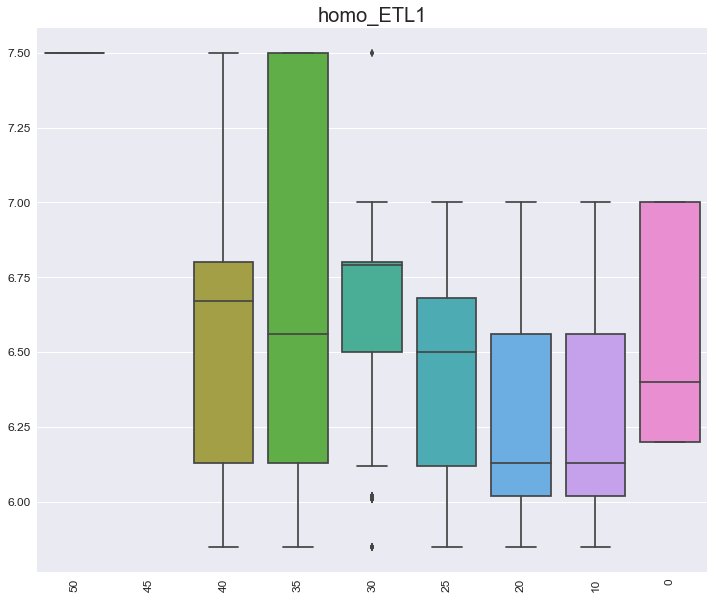

In [113]:
layer('homo_ETL1')

,50,45,40,35,30,25,20,10,0
count,4.000000e+01,0.0,7543.000000,4654.000000,4406.000000,15366.000000,631.000000,631.000000,5648.000000
mean,2.990000e+00,NaN,2.874797,2.839201,2.940163,2.809786,2.747765,2.747765,2.566395
std,1.798987e-15,NaN,0.239819,0.152221,0.300798,0.188570,0.070300,0.070300,0.047240
min,2.990000e+00,NaN,2.690000,2.690000,2.690000,2.690000,2.690000,2.690000,2.500000
25%,2.990000e+00,NaN,2.700000,2.700000,2.700000,2.700000,2.700000,2.700000,2.500000
50%,2.990000e+00,NaN,2.760000,2.750000,2.760000,2.750000,2.750000,2.750000,2.600000
75%,2.990000e+00,NaN,2.990000,2.990000,3.360000,2.800000,2.750000,2.750000,2.600000
max,2.990000e+00,NaN,3.400000,3.400000,3.400000,3.400000,2.950000,2.950000,2.600000


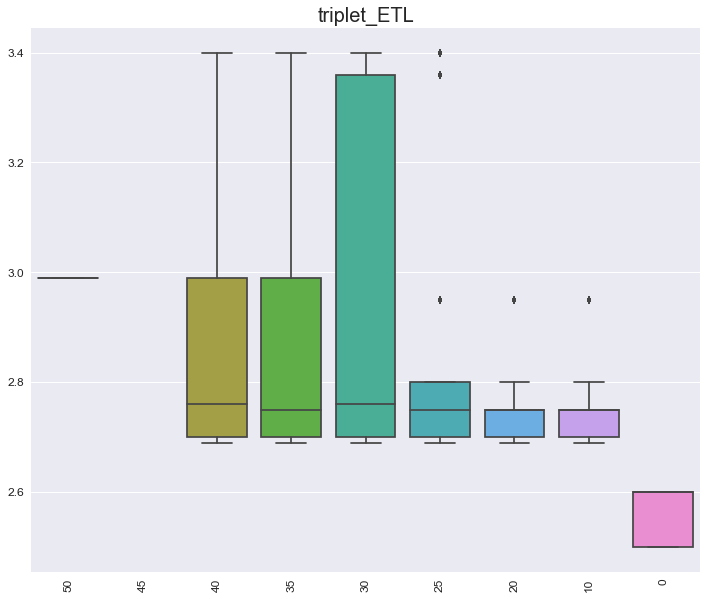

In [114]:
layer('triplet_ETL')

,50,45,40,35,30,25,20,10,0
count,4.000000e+01,0.0,7543.000000,4654.000000,4406.000000,15366.000000,631.000000,631.000000,5648.000000
mean,2.400000e+00,NaN,2.404501,2.442037,2.405851,2.420417,2.471791,2.471791,2.417459
std,1.349240e-15,NaN,0.243431,0.261561,0.235831,0.255106,0.236500,0.236500,0.256890
min,2.400000e+00,NaN,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000
25%,2.400000e+00,NaN,2.280000,2.280000,2.280000,2.280000,2.300000,2.300000,2.270000
50%,2.400000e+00,NaN,2.400000,2.400000,2.400000,2.400000,2.400000,2.400000,2.300000
75%,2.400000e+00,NaN,2.460000,2.550000,2.460000,2.550000,2.670000,2.670000,2.460000
max,2.400000e+00,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


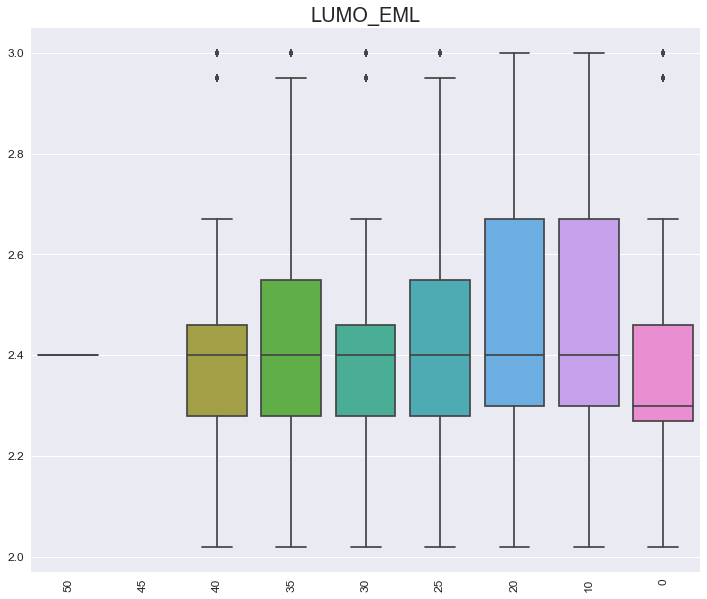

In [115]:
layer('LUMO_EML')

,50,45,40,35,30,25,20,10,0
count,40.0,0.0,7543.000000,4654.000000,4406.000000,15366.000000,631.000000,631.000000,5648.000000
mean,7.5,NaN,5.956772,5.814334,6.212240,5.822501,5.854326,5.854326,5.808368
std,0.0,NaN,0.502064,0.122426,0.755413,0.182147,0.099156,0.099156,0.139474
min,7.5,NaN,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000
25%,7.5,NaN,5.710000,5.710000,5.700000,5.710000,5.800000,5.800000,5.700000
50%,7.5,NaN,5.850000,5.850000,5.850000,5.850000,5.900000,5.900000,5.800000
75%,7.5,NaN,5.900000,5.900000,7.500000,5.900000,5.920000,5.920000,5.900000
max,7.5,NaN,7.500000,6.060000,7.500000,7.500000,6.060000,6.060000,7.500000


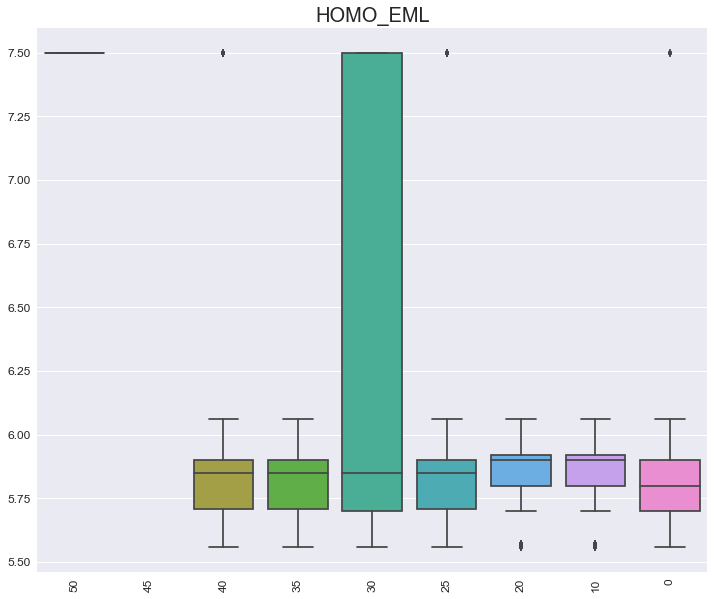

In [116]:
layer('HOMO_EML')

In [117]:
triplet29 = new_X.loc[new_X['triplet_HOST'] == 2.7]
print(triplet29.shape)
device50 = triplet29.loc[triplet29['cd/a'] > 50]
device45 = triplet29.loc[(triplet29['cd/a'] >= 45) & (new_X['cd/a'] < 45)]
device40 = triplet29.loc[(triplet29['cd/a'] >= 40) & (new_X['cd/a'] < 50)]
device35 = triplet29.loc[(triplet29['cd/a'] >= 35) & (new_X['cd/a'] < 40)]
device30 = triplet29.loc[(triplet29['cd/a'] >= 30) & (new_X['cd/a'] < 35)]
device25 = triplet29.loc[(triplet29['cd/a'] >= 25) & (new_X['cd/a'] < 30)]
device20 = triplet29.loc[(triplet29['cd/a'] >= 20) & (new_X['cd/a'] < 25)]
device10 = triplet29.loc[(triplet29['cd/a'] >= 10) & (new_X['cd/a'] < 20)]
device = triplet29.loc[triplet29['cd/a'] < 10]
device50.shape

(38760, 32)


(40, 32)

,50,45,40,35,30,25,20,10,0
count,40.000000,0.0,3068.000000,8909.000000,638.000000,12581.000000,7404.000000,7404.000000,5540.000000
mean,2.257500,NaN,2.327973,2.236538,2.282194,2.305655,2.169568,2.169568,2.251339
std,0.201644,NaN,0.147794,0.206001,0.201440,0.140106,0.251597,0.251597,0.200909
min,1.900000,NaN,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000
25%,2.150000,NaN,2.260000,2.000000,2.200000,2.200000,1.900000,1.900000,2.000000
50%,2.330000,NaN,2.400000,2.260000,2.400000,2.400000,2.000000,2.000000,2.260000
75%,2.400000,NaN,2.400000,2.400000,2.400000,2.400000,2.500000,2.500000,2.400000
max,2.500000,NaN,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000


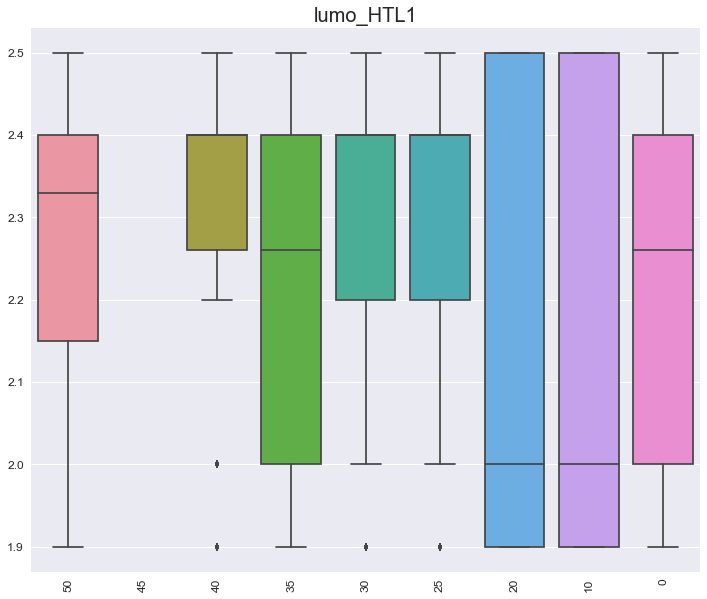

In [118]:
levels = ['lumo_HTL1', 'homo_HTL1', 'triplet_HTL', 'lumo_ETL1', 'homo_ETL1', 'triplet_ETL', 'LUMO_EML', 'HOMO_EML']

layer('lumo_HTL1')

,50,45,40,35,30,25,20,10,0
count,40.000000,0.0,3068.000000,8909.000000,638.000000,12581.000000,7404.000000,7404.000000,5540.000000
mean,5.625000,NaN,5.842536,5.559569,5.673354,5.781647,5.343247,5.343247,5.612744
std,0.323245,NaN,0.291628,0.291535,0.362676,0.231119,0.250924,0.250924,0.316821
min,5.100000,NaN,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000
25%,5.425000,NaN,5.700000,5.200000,5.200000,5.700000,5.100000,5.100000,5.200000
50%,5.700000,NaN,5.900000,5.700000,5.700000,5.800000,5.200000,5.200000,5.700000
75%,5.825000,NaN,6.100000,5.800000,5.900000,5.900000,5.500000,5.500000,5.800000
max,6.100000,NaN,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000


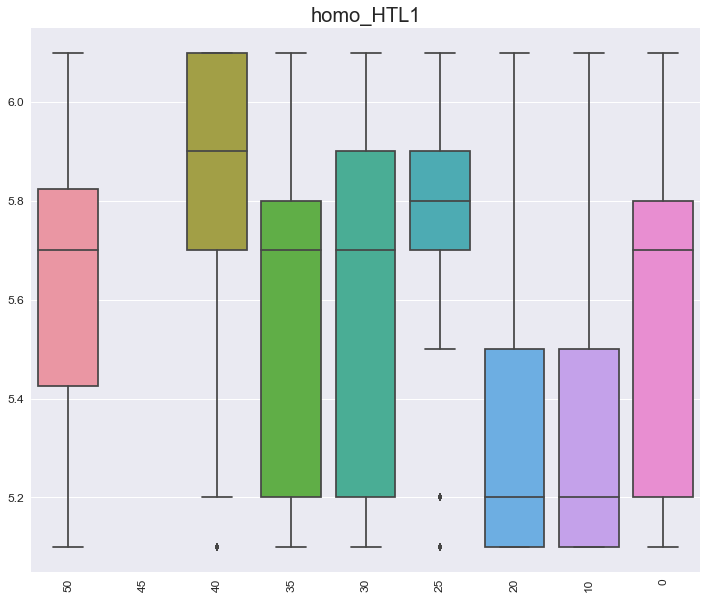

In [119]:
layer('homo_HTL1')

,50,45,40,35,30,25,20,10,0
count,40.000000,0.0,3068.000000,8909.000000,638.000000,12581.000000,7404.000000,7404.000000,5540.000000
mean,2.762500,NaN,2.809211,2.750900,2.781536,2.835862,2.630804,2.630804,2.758486
std,0.223076,NaN,0.171640,0.231423,0.208655,0.171319,0.236214,0.236214,0.220404
min,2.300000,NaN,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000
25%,2.647500,NaN,2.800000,2.580000,2.670000,2.800000,2.300000,2.300000,2.580000
50%,2.835000,NaN,2.800000,2.870000,2.800000,2.940000,2.670000,2.670000,2.800000
75%,2.940000,NaN,2.940000,2.940000,2.940000,2.940000,2.870000,2.870000,2.940000
max,3.000000,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


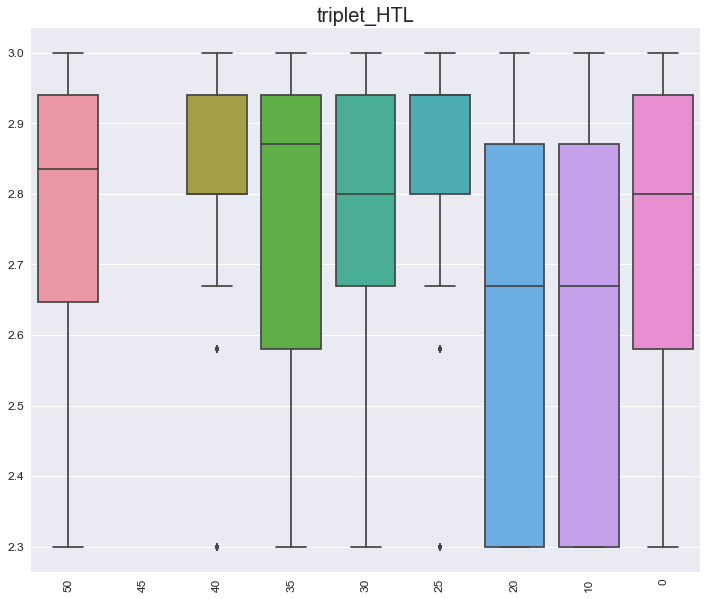

In [120]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,10,0
count,4.000000e+01,0.0,3068.000000,8909.000000,638.000000,12581.000000,7404.000000,7404.000000,5540.000000
mean,3.470000e+00,NaN,2.848898,2.854211,2.967586,2.706933,2.813258,2.813258,3.092816
std,4.497466e-16,NaN,0.398962,0.336516,0.422720,0.253531,0.263756,0.263756,0.292265
min,3.470000e+00,NaN,2.260000,2.260000,2.260000,2.260000,2.260000,2.260000,2.800000
25%,3.470000e+00,NaN,2.520000,2.700000,2.600000,2.520000,2.700000,2.700000,2.800000
50%,3.470000e+00,NaN,2.730000,2.750000,2.880000,2.700000,2.750000,2.750000,3.000000
75%,3.470000e+00,NaN,3.320000,3.200000,3.470000,2.880000,2.910000,2.910000,3.500000
max,3.470000e+00,NaN,3.470000,3.470000,3.470000,3.320000,3.320000,3.320000,3.500000


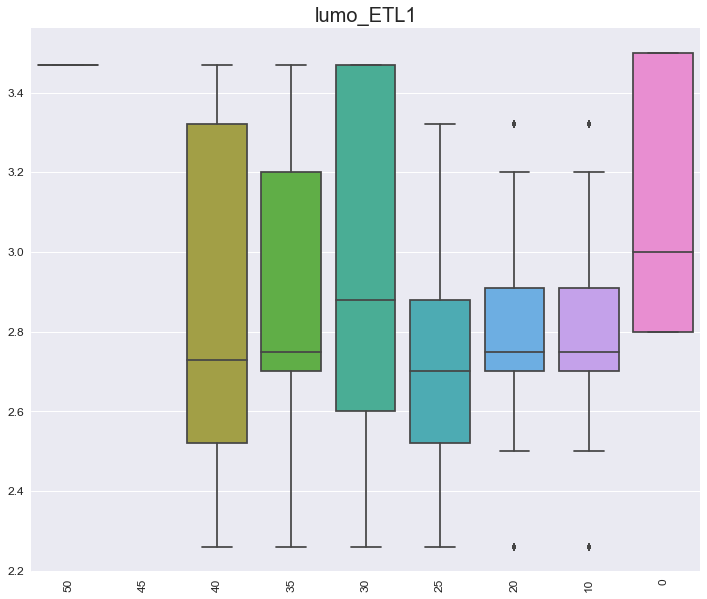

In [121]:
layer('lumo_ETL1')

,50,45,40,35,30,25,20,10,0
count,40.0,0.0,3068.000000,8909.000000,638.000000,12581.000000,7404.000000,7404.000000,5540.000000
mean,7.5,NaN,6.714003,6.566993,6.838480,6.464365,6.420066,6.420066,6.524982
std,0.0,NaN,0.521666,0.471614,0.564402,0.344913,0.334033,0.334033,0.337344
min,7.5,NaN,5.850000,5.850000,5.850000,5.850000,5.850000,5.850000,6.200000
25%,7.5,NaN,6.300000,6.130000,6.500000,6.130000,6.120000,6.120000,6.200000
50%,7.5,NaN,6.790000,6.560000,6.800000,6.500000,6.500000,6.500000,6.400000
75%,7.5,NaN,7.000000,6.800000,7.500000,6.790000,6.680000,6.680000,7.000000
max,7.5,NaN,7.500000,7.500000,7.500000,7.000000,7.000000,7.000000,7.000000


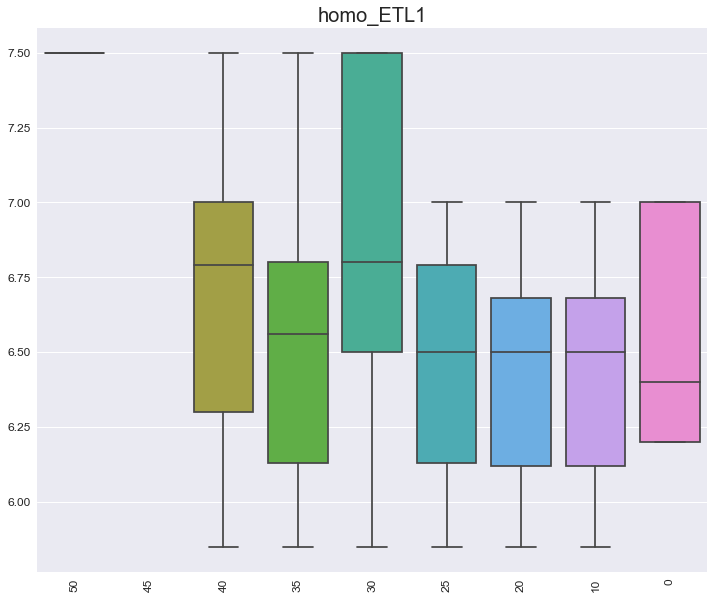

In [122]:
layer('homo_ETL1')

,50,45,40,35,30,25,20,10,0
count,4.000000e+01,0.0,3068.000000,8909.000000,638.000000,12581.000000,7404.000000,7404.000000,5540.000000
mean,2.990000e+00,NaN,2.902037,2.843976,2.918683,2.853534,2.803720,2.803720,2.566173
std,1.798987e-15,NaN,0.237147,0.201402,0.218331,0.242832,0.175654,0.175654,0.047316
min,2.990000e+00,NaN,2.690000,2.690000,2.690000,2.690000,2.690000,2.690000,2.500000
25%,2.990000e+00,NaN,2.700000,2.700000,2.750000,2.700000,2.700000,2.700000,2.500000
50%,2.990000e+00,NaN,2.800000,2.750000,2.950000,2.750000,2.750000,2.750000,2.600000
75%,2.990000e+00,NaN,2.990000,2.950000,2.990000,2.800000,2.800000,2.800000,2.600000
max,2.990000e+00,NaN,3.400000,3.400000,3.400000,3.400000,3.400000,3.400000,2.600000


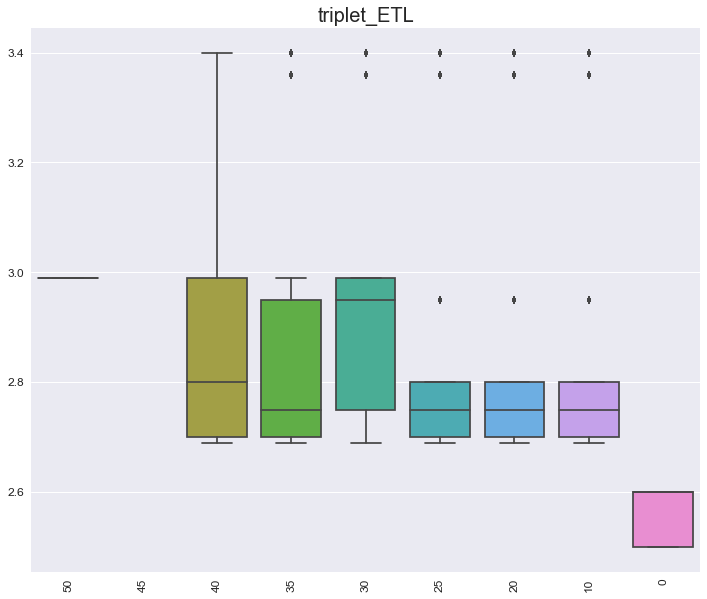

In [123]:
layer('triplet_ETL')

,50,45,40,35,30,25,20,10,0
count,4.000000e+01,0.0,3068.000000,8909.000000,638.000000,12581.000000,7404.000000,7404.000000,5540.000000
mean,2.400000e+00,NaN,2.404492,2.423199,2.415580,2.422475,2.413674,2.413674,2.416119
std,1.349240e-15,NaN,0.233478,0.257047,0.143285,0.260563,0.240425,0.240425,0.256396
min,2.400000e+00,NaN,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000
25%,2.400000e+00,NaN,2.280000,2.280000,2.400000,2.280000,2.280000,2.280000,2.270000
50%,2.400000e+00,NaN,2.400000,2.400000,2.400000,2.400000,2.300000,2.300000,2.300000
75%,2.400000e+00,NaN,2.460000,2.460000,2.400000,2.460000,2.460000,2.460000,2.460000
max,2.400000e+00,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


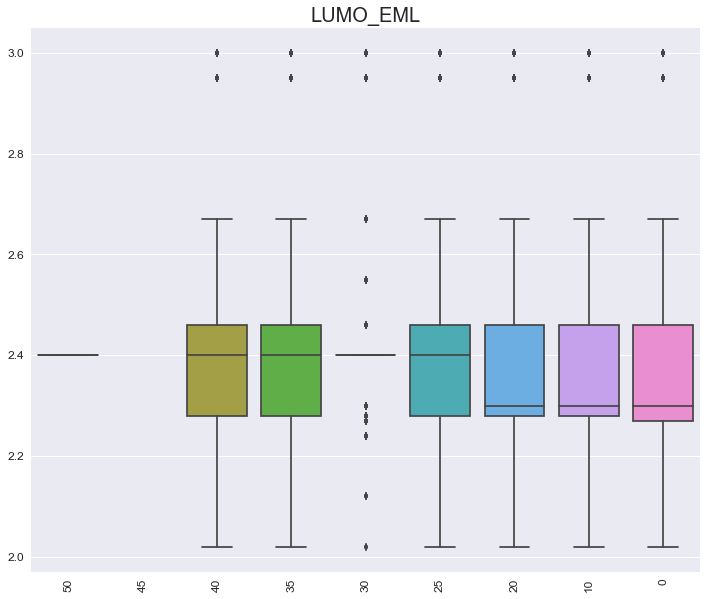

In [124]:
layer('LUMO_EML')

,50,45,40,35,30,25,20,10,0
count,40.0,0.0,3068.000000,8909.000000,638.000000,12581.000000,7404.000000,7404.000000,5540.000000
mean,7.5,NaN,6.163507,5.813933,6.921834,5.910112,5.814206,5.814206,5.808027
std,0.0,NaN,0.701683,0.163205,0.791615,0.430219,0.119797,0.119797,0.139688
min,7.5,NaN,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000
25%,7.5,NaN,5.800000,5.710000,5.900000,5.700000,5.710000,5.710000,5.700000
50%,7.5,NaN,5.900000,5.850000,7.500000,5.850000,5.850000,5.850000,5.800000
75%,7.5,NaN,6.060000,5.900000,7.500000,5.900000,5.900000,5.900000,5.900000
max,7.5,NaN,7.500000,7.500000,7.500000,7.500000,6.060000,6.060000,7.500000


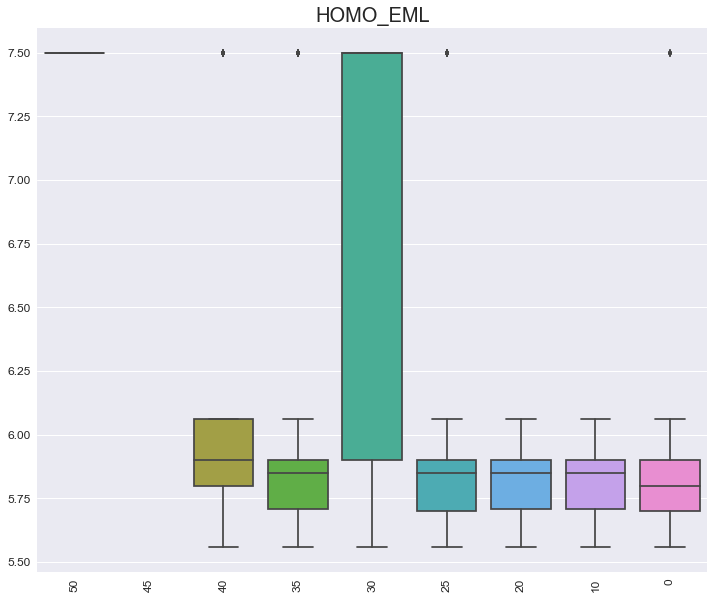

In [125]:
layer('HOMO_EML')

In [126]:
triplet29 = new_X.loc[new_X['triplet_HOST'] == 2.65]
print(triplet29.shape)
device50 = triplet29.loc[triplet29['cd/a'] > 50]
device45 = triplet29.loc[(triplet29['cd/a'] >= 45) & (new_X['cd/a'] < 45)]
device40 = triplet29.loc[(triplet29['cd/a'] >= 40) & (new_X['cd/a'] < 50)]
device35 = triplet29.loc[(triplet29['cd/a'] >= 35) & (new_X['cd/a'] < 40)]
device30 = triplet29.loc[(triplet29['cd/a'] >= 30) & (new_X['cd/a'] < 35)]
device25 = triplet29.loc[(triplet29['cd/a'] >= 25) & (new_X['cd/a'] < 30)]
device20 = triplet29.loc[(triplet29['cd/a'] >= 20) & (new_X['cd/a'] < 25)]
device10 = triplet29.loc[(triplet29['cd/a'] >= 10) & (new_X['cd/a'] < 20)]
device = triplet29.loc[triplet29['cd/a'] < 10]
device50.shape

(38760, 32)


(40, 32)

,50,45,40,35,30,25,20,10,0
count,40.000000,0.0,3567.000000,8393.000000,738.000000,13121.000000,6781.000000,6781.000000,4185.000000
mean,2.257500,NaN,2.328450,2.230504,2.287317,2.295746,2.176343,2.176343,2.248124
std,0.201644,NaN,0.141379,0.209356,0.194649,0.149126,0.256195,0.256195,0.201488
min,1.900000,NaN,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000,1.900000
25%,2.150000,NaN,2.260000,2.000000,2.200000,2.200000,1.900000,1.900000,2.000000
50%,2.330000,NaN,2.400000,2.260000,2.400000,2.400000,2.000000,2.000000,2.260000
75%,2.400000,NaN,2.400000,2.400000,2.400000,2.400000,2.500000,2.500000,2.400000
max,2.500000,NaN,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000


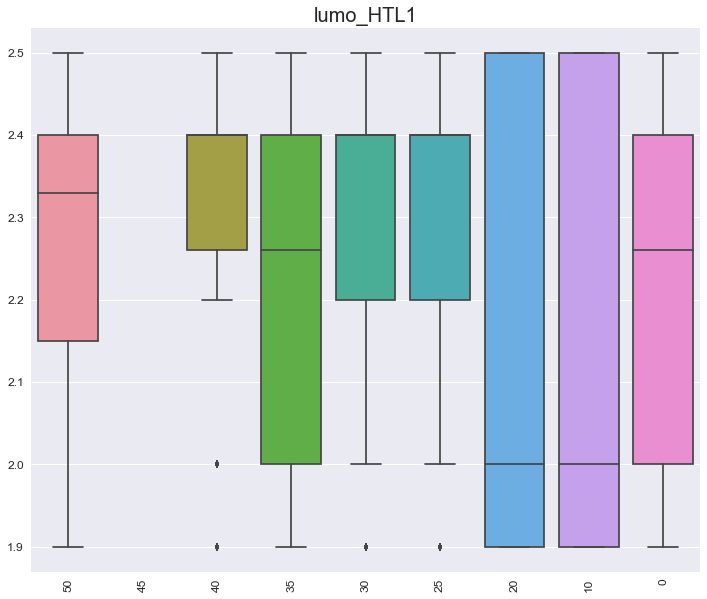

In [127]:
levels = ['lumo_HTL1', 'homo_HTL1', 'triplet_HTL', 'lumo_ETL1', 'homo_ETL1', 'triplet_ETL', 'LUMO_EML', 'HOMO_EML']

layer('lumo_HTL1')

,50,45,40,35,30,25,20,10,0
count,40.000000,0.0,3567.000000,8393.000000,738.000000,13121.000000,6781.000000,6781.000000,4185.000000
mean,5.625000,NaN,5.842585,5.543369,5.671816,5.768310,5.329184,5.329184,5.616249
std,0.323245,NaN,0.275653,0.289318,0.347532,0.239681,0.247618,0.247618,0.319280
min,5.100000,NaN,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000,5.100000
25%,5.425000,NaN,5.700000,5.200000,5.200000,5.700000,5.100000,5.100000,5.200000
50%,5.700000,NaN,5.900000,5.700000,5.700000,5.800000,5.200000,5.200000,5.700000
75%,5.825000,NaN,6.100000,5.700000,5.900000,5.900000,5.500000,5.500000,5.800000
max,6.100000,NaN,6.100000,6.100000,6.100000,6.100000,5.900000,5.900000,6.100000


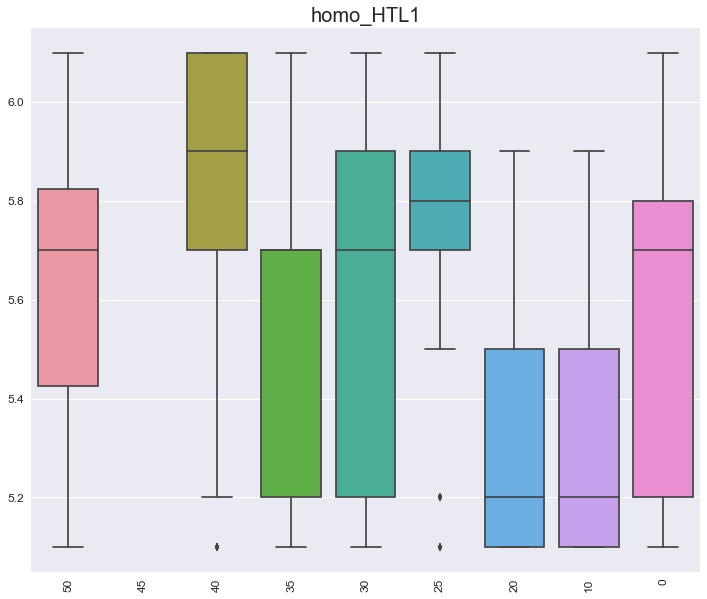

In [128]:
layer('homo_HTL1')

,50,45,40,35,30,25,20,10,0
count,40.000000,0.0,3567.000000,8393.000000,738.000000,13121.000000,6781.000000,6781.000000,4185.000000
mean,2.762500,NaN,2.815767,2.745569,2.782304,2.833173,2.616531,2.616531,2.764323
std,0.223076,NaN,0.171263,0.232837,0.214557,0.171437,0.236680,0.236680,0.215425
min,2.300000,NaN,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000,2.300000
25%,2.647500,NaN,2.800000,2.580000,2.670000,2.800000,2.300000,2.300000,2.670000
50%,2.835000,NaN,2.800000,2.870000,2.800000,2.940000,2.670000,2.670000,2.800000
75%,2.940000,NaN,2.940000,2.940000,2.940000,2.940000,2.870000,2.870000,2.940000
max,3.000000,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


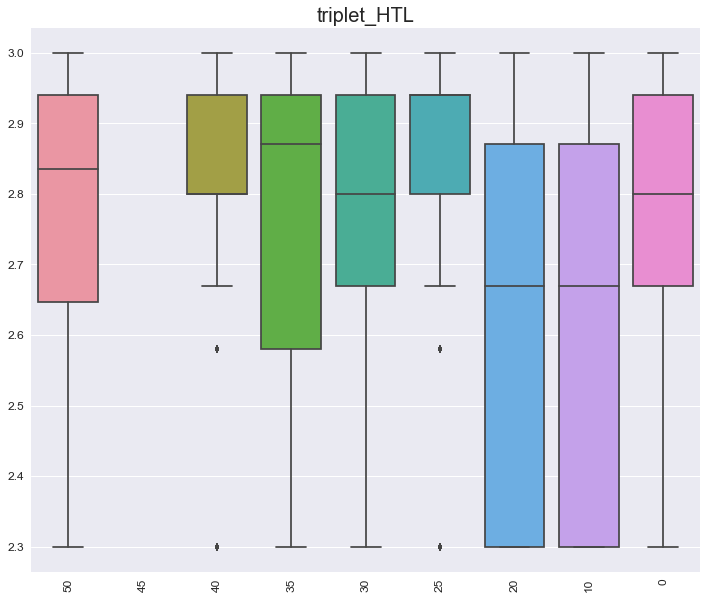

In [129]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,10,0
count,4.000000e+01,0.0,3567.000000,8393.000000,738.000000,13121.000000,6781.000000,6781.000000,4185.000000
mean,3.470000e+00,NaN,2.819422,2.865807,2.951192,2.705576,2.825507,2.825507,3.090729
std,4.497466e-16,NaN,0.386562,0.336859,0.417157,0.253101,0.262246,0.262246,0.292620
min,3.470000e+00,NaN,2.260000,2.260000,2.260000,2.260000,2.260000,2.260000,2.800000
25%,3.470000e+00,NaN,2.520000,2.700000,2.600000,2.520000,2.700000,2.700000,2.800000
50%,3.470000e+00,NaN,2.700000,2.750000,2.880000,2.700000,2.750000,2.750000,3.000000
75%,3.470000e+00,NaN,3.200000,3.200000,3.470000,2.880000,2.910000,2.910000,3.500000
max,3.470000e+00,NaN,3.470000,3.470000,3.470000,3.320000,3.320000,3.320000,3.500000


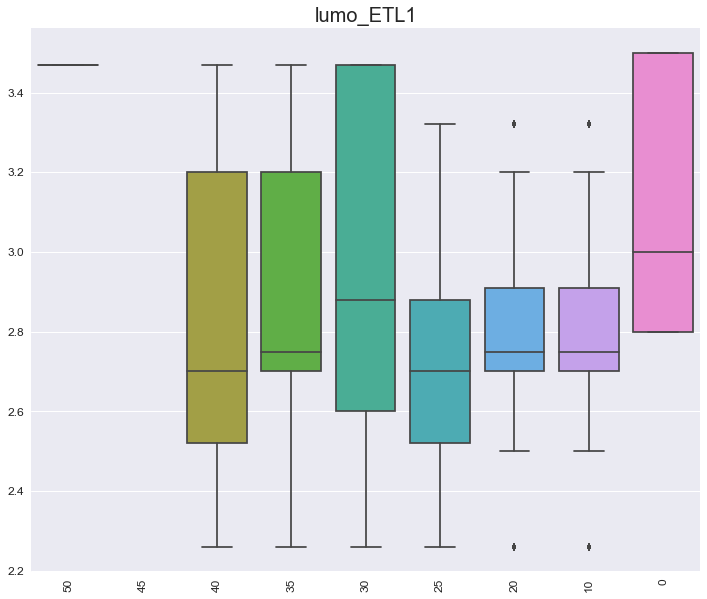

In [130]:
layer('lumo_ETL1')

,50,45,40,35,30,25,20,10,0
count,40.0,0.0,3567.000000,8393.000000,738.000000,13121.000000,6781.000000,6781.000000,4185.000000
mean,7.5,NaN,6.678010,6.571660,6.797304,6.457999,6.429876,6.429876,6.522724
std,0.0,NaN,0.508235,0.476098,0.568775,0.346088,0.331988,0.331988,0.337636
min,7.5,NaN,5.850000,5.850000,5.850000,5.850000,5.850000,5.850000,6.200000
25%,7.5,NaN,6.300000,6.130000,6.300000,6.120000,6.120000,6.120000,6.200000
50%,7.5,NaN,6.680000,6.560000,6.790000,6.500000,6.500000,6.500000,6.400000
75%,7.5,NaN,6.800000,6.800000,7.500000,6.790000,6.680000,6.680000,7.000000
max,7.5,NaN,7.500000,7.500000,7.500000,7.000000,7.000000,7.000000,7.000000


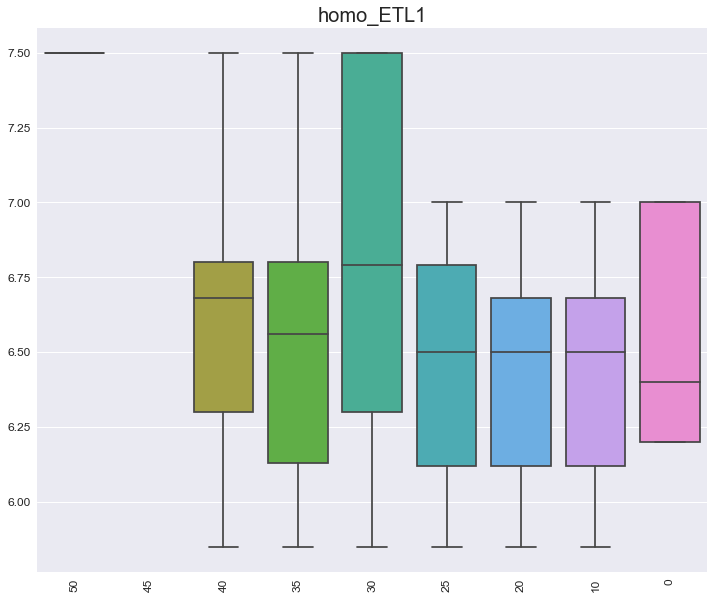

In [131]:
layer('homo_ETL1')

,50,45,40,35,30,25,20,10,0
count,4.000000e+01,0.0,3567.000000,8393.000000,738.000000,13121.000000,6781.000000,6781.000000,4185.000000
mean,2.990000e+00,NaN,2.898099,2.841902,2.904160,2.851119,2.804778,2.804778,2.566619
std,1.798987e-15,NaN,0.241314,0.196991,0.214098,0.240994,0.175206,0.175206,0.047163
min,2.990000e+00,NaN,2.690000,2.690000,2.690000,2.690000,2.690000,2.690000,2.500000
25%,2.990000e+00,NaN,2.700000,2.700000,2.740000,2.700000,2.700000,2.700000,2.500000
50%,2.990000e+00,NaN,2.760000,2.750000,2.800000,2.750000,2.750000,2.750000,2.600000
75%,2.990000e+00,NaN,2.990000,2.950000,2.990000,2.800000,2.800000,2.800000,2.600000
max,2.990000e+00,NaN,3.400000,3.400000,3.400000,3.400000,3.400000,3.400000,2.600000


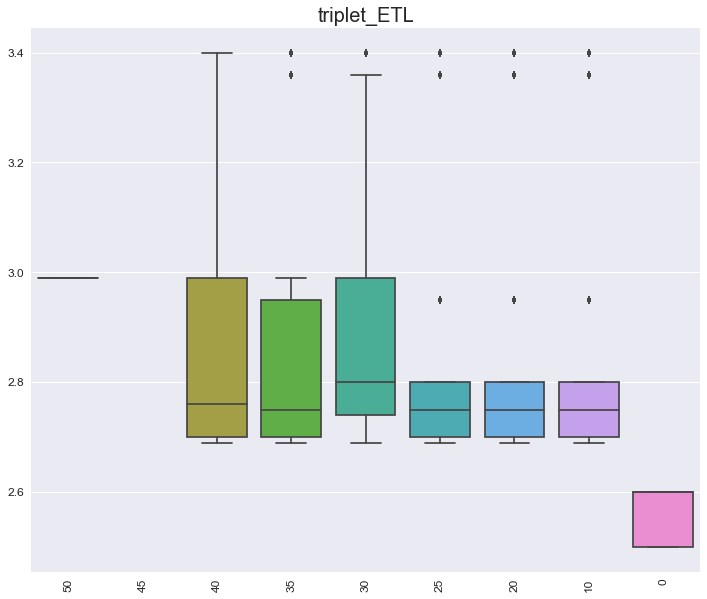

In [132]:
layer('triplet_ETL')

,50,45,40,35,30,25,20,10,0
count,4.000000e+01,0.0,3567.000000,8393.000000,738.000000,13121.000000,6781.000000,6781.000000,4185.000000
mean,2.400000e+00,NaN,2.413804,2.421271,2.403564,2.426040,2.406242,2.406242,2.414172
std,1.349240e-15,NaN,0.245956,0.254256,0.122911,0.264143,0.232086,0.232086,0.253173
min,2.400000e+00,NaN,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000,2.020000
25%,2.400000e+00,NaN,2.280000,2.280000,2.400000,2.280000,2.280000,2.280000,2.270000
50%,2.400000e+00,NaN,2.400000,2.400000,2.400000,2.400000,2.300000,2.300000,2.300000
75%,2.400000e+00,NaN,2.460000,2.460000,2.400000,2.460000,2.460000,2.460000,2.460000
max,2.400000e+00,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


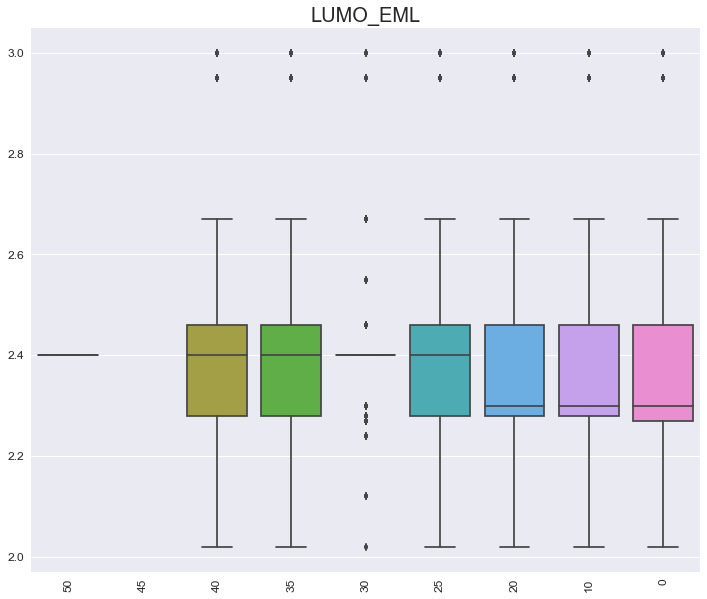

In [133]:
layer('LUMO_EML')

,50,45,40,35,30,25,20,10,0
count,40.0,0.0,3567.000000,8393.000000,738.000000,13121.000000,6781.000000,6781.000000,4185.000000
mean,7.5,NaN,6.116266,5.813308,6.960420,5.895610,5.813995,5.813995,5.809209
std,0.0,NaN,0.664151,0.163144,0.779735,0.403341,0.117204,0.117204,0.125405
min,7.5,NaN,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000,5.560000
25%,7.5,NaN,5.710000,5.710000,5.900000,5.700000,5.710000,5.710000,5.710000
50%,7.5,NaN,5.860000,5.800000,7.500000,5.850000,5.850000,5.850000,5.800000
75%,7.5,NaN,6.060000,5.900000,7.500000,5.900000,5.900000,5.900000,5.900000
max,7.5,NaN,7.500000,7.500000,7.500000,7.500000,6.060000,6.060000,6.060000


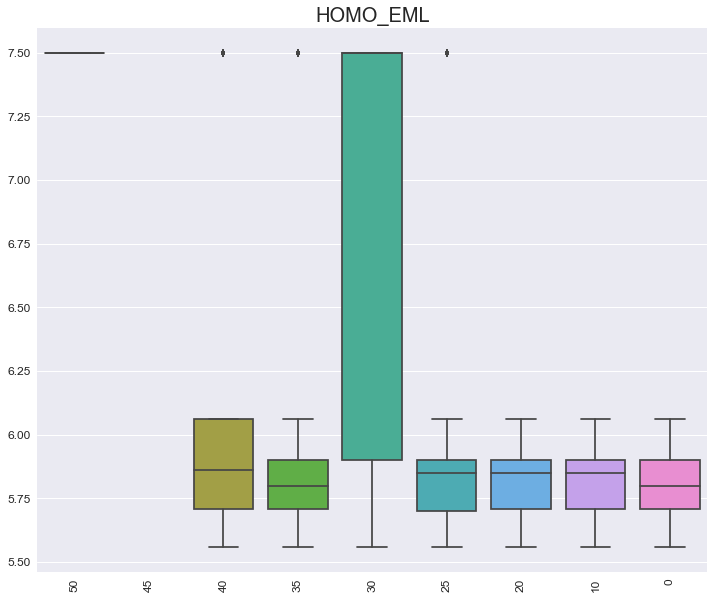

In [134]:
layer('HOMO_EML')

In [135]:
triplet29 = new_X.loc[new_X['triplet_HOST'] == 2.6]
print(triplet29.shape)
device50 = triplet29.loc[triplet29['cd/a'] > 50]
device45 = triplet29.loc[(triplet29['cd/a'] >= 45) & (new_X['cd/a'] < 45)]
device40 = triplet29.loc[(triplet29['cd/a'] >= 40) & (new_X['cd/a'] < 50)]
device35 = triplet29.loc[(triplet29['cd/a'] >= 35) & (new_X['cd/a'] < 40)]
device30 = triplet29.loc[(triplet29['cd/a'] >= 30) & (new_X['cd/a'] < 35)]
device25 = triplet29.loc[(triplet29['cd/a'] >= 25) & (new_X['cd/a'] < 30)]
device20 = triplet29.loc[(triplet29['cd/a'] >= 20) & (new_X['cd/a'] < 25)]
device10 = triplet29.loc[(triplet29['cd/a'] >= 10) & (new_X['cd/a'] < 20)]
device = triplet29.loc[triplet29['cd/a'] < 10]
device50.shape

(0, 32)


(0, 32)

,50,45,40,35,30,25,20,10,0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


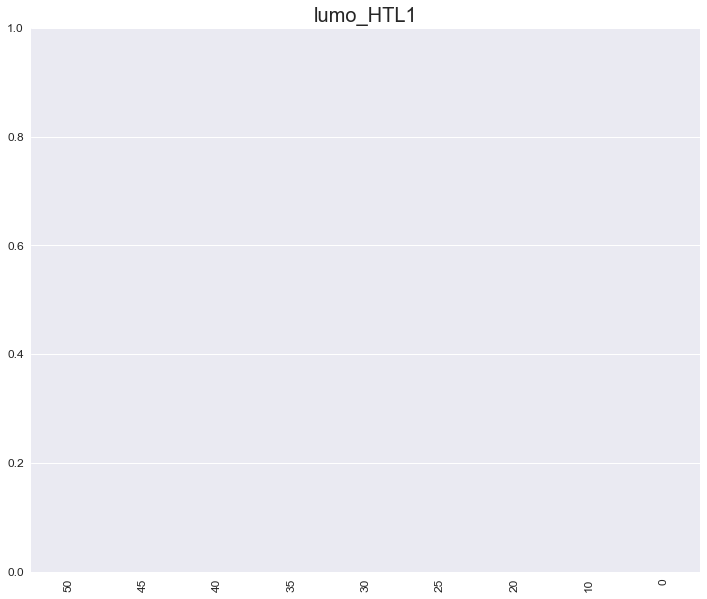

In [136]:
levels = ['lumo_HTL1', 'homo_HTL1', 'triplet_HTL', 'lumo_ETL1', 'homo_ETL1', 'triplet_ETL', 'LUMO_EML', 'HOMO_EML']

layer('lumo_HTL1')

,50,45,40,35,30,25,20,10,0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


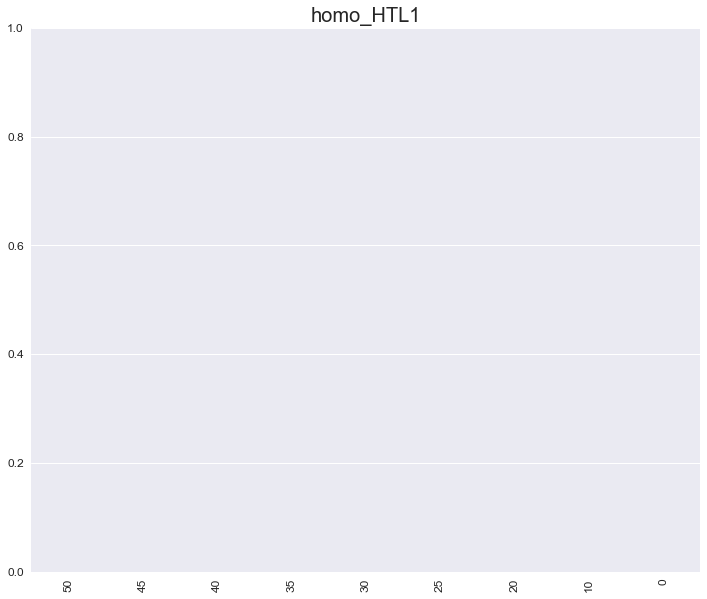

In [137]:
layer('homo_HTL1')

,50,45,40,35,30,25,20,10,0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


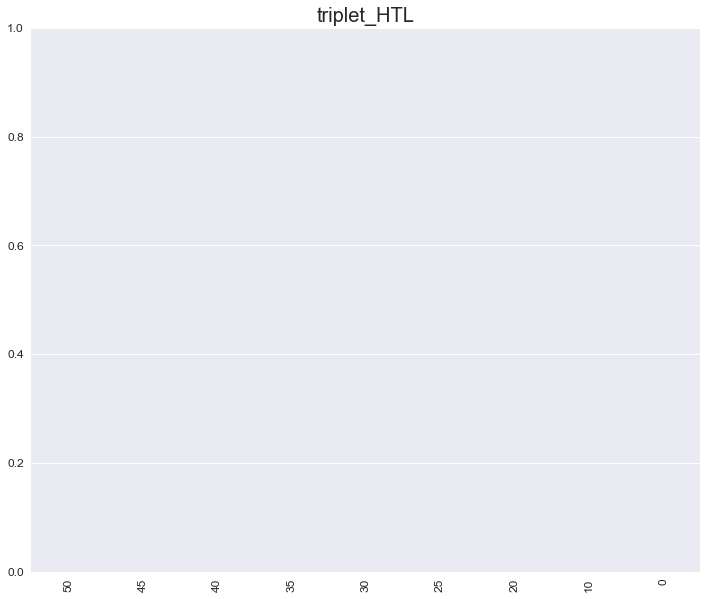

In [138]:
layer('triplet_HTL')

,50,45,40,35,30,25,20,10,0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


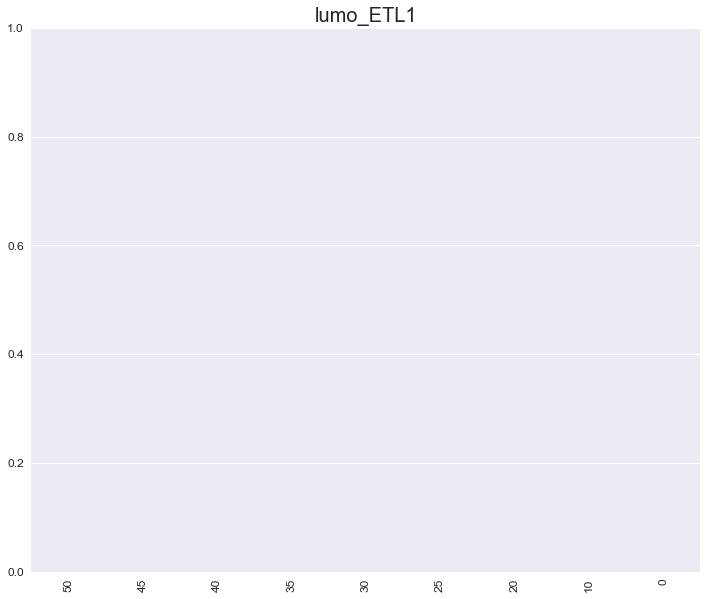

In [139]:
layer('lumo_ETL1')

,50,45,40,35,30,25,20,10,0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


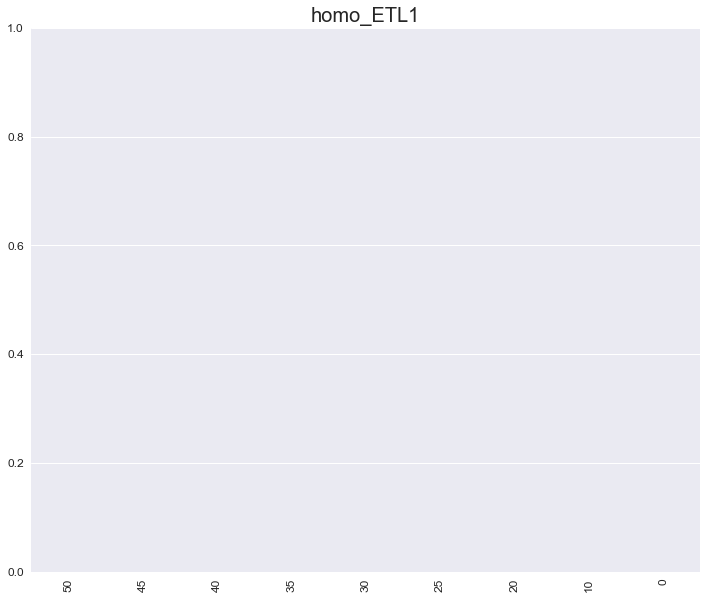

In [140]:
layer('homo_ETL1')

,50,45,40,35,30,25,20,10,0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


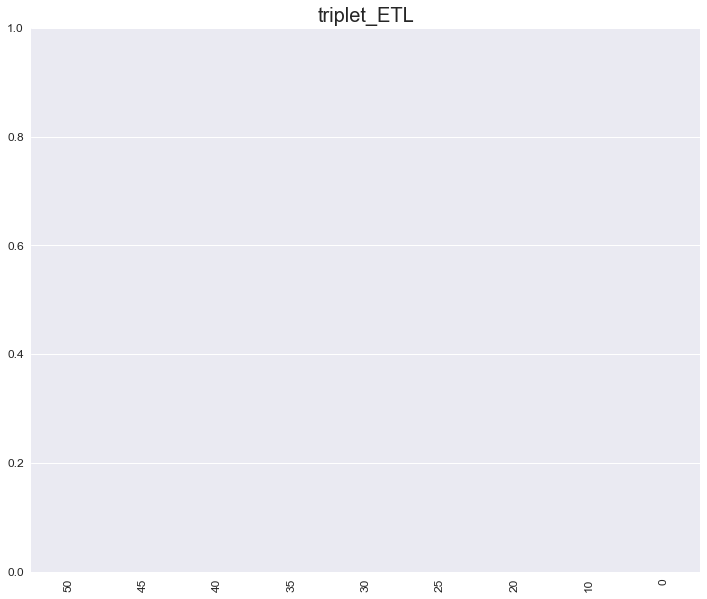

In [141]:
layer('triplet_ETL')

,50,45,40,35,30,25,20,10,0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


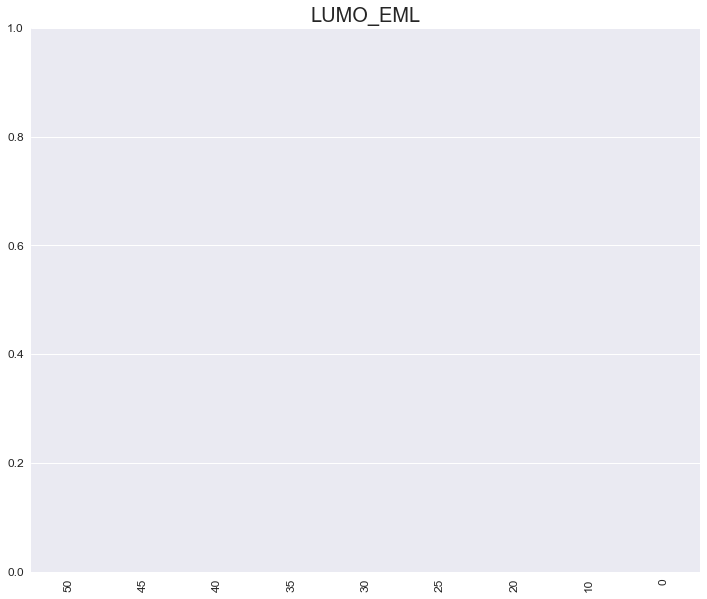

In [142]:
layer('LUMO_EML')

,50,45,40,35,30,25,20,10,0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


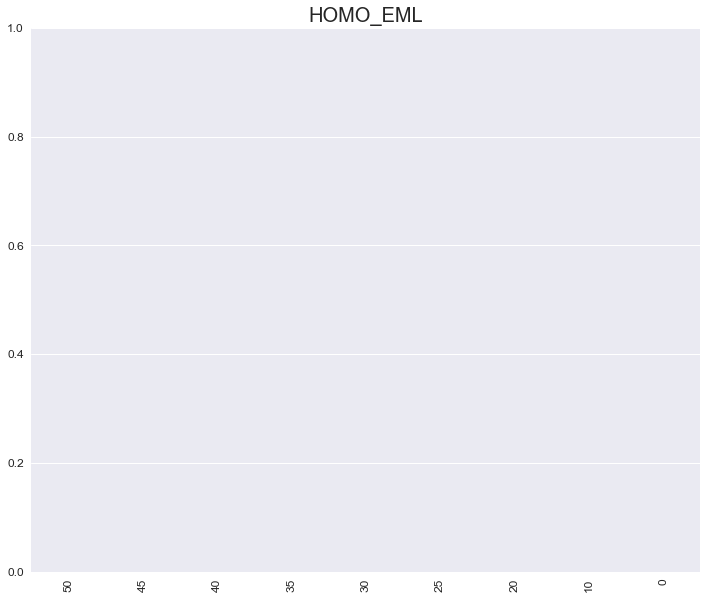

In [143]:
layer('HOMO_EML')